In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [161]:
df = pd.read_csv('C:/Users/sreya/Downloads/fraudTrain.csv')
df2 = pd.read_csv('C:/Users/sreya/Downloads/fraudTest.csv')

In [162]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [163]:
df2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [164]:
print('Our Training dataset')
print('Dimensions: ' + str(df.shape))
print(df.info())
print('\nOur Test dataset')
print('Dimensions: ' + str(df2.shape))
print(df2.info())
print(df['is_fraud'].value_counts())

Our Training dataset
Dimensions: (1296675, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    12

In [165]:
df = df.drop(columns = ['Unnamed: 0'])
df2 = df2.drop(columns = ['Unnamed: 0'])

In [166]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [167]:
df2

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [168]:
df.rename(columns = {'trans_date_trans_time':'transaction_date_time'}, inplace=True)
df2.rename(columns = {'trans_date_trans_time':'transaction_date_time'}, inplace=True)
df.rename(columns = {'cc_num':'credit_card_number'}, inplace=True)
df2.rename(columns = {'cc_num':'credit_card_number'}, inplace=True)
df.rename(columns = {'trans_num':'transaction_number'}, inplace=True)

In [169]:
df

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,transaction_number,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [170]:
df2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [171]:
df.dtypes

transaction_date_time     object
credit_card_number         int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
transaction_number        object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [172]:
df2.dtypes

transaction_date_time     object
credit_card_number         int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [173]:
df.isna().sum()

transaction_date_time    0
credit_card_number       0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
transaction_number       0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [174]:
df2.isna().sum()

transaction_date_time    0
credit_card_number       0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [175]:
df.duplicated().value_counts()

False    1296675
dtype: int64

In [176]:
df2.duplicated().value_counts()

False    555719
dtype: int64

In [177]:
df['gender'] = df['gender'].map({'M' : 0, 'F' : 1})
df2['gender'] = df2['gender'].map({'M' : 0, 'F' : 1})
print(df2['gender'].head())
print(df['gender'].head())

0    0
1    1
2    1
3    0
4    0
Name: gender, dtype: int64
0    1
1    1
2    0
3    0
4    0
Name: gender, dtype: int64


In [178]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [179]:
legit = df[df.is_fraud == 0]
fraud = df[df.is_fraud == 1]

In [180]:
print(legit.shape)
print(fraud.shape)

(1289169, 22)
(7506, 22)


In [181]:
legit_sample = legit.sample(n=15000)
print(legit_sample.shape)

(15000, 22)


In [182]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [183]:
new_dataset.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,transaction_number,unix_time,merch_lat,merch_long,is_fraud
201654,2019-04-13 22:00:36,4769426683924058915,"fraud_Larson, Quitzon and Spencer",travel,4.25,Andrea,Cruz,1,26572 Hodge Villages Suite 512,Mifflin,...,40.5553,-77.4001,1909,Mining engineer,1954-08-22,65c2e45a48925dda985dc89cf20b2592,1334354436,39.814943,-77.643320,0
476585,2019-07-28 13:23:02,371226440126102,fraud_Waelchi Inc,kids_pets,130.14,Stacy,Lambert,1,85430 Julie Trafficway Suite 792,Mulberry Grove,...,38.9311,-89.2463,1810,Race relations officer,1974-12-24,3a2ba79065a841132d9ff60ddf875755,1343481782,39.532547,-90.246223,0
162674,2019-03-27 11:26:37,4169759661243568,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,103.09,Jamie,Carr,1,55363 Aaron Circle Suite 450,Lawn,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,3be8da9d6520d02d50c12b07e6608d5f,1332847597,39.956378,-77.003213,0
931336,2020-01-05 04:37:04,3565196229855512,fraud_Bailey-Morar,grocery_pos,59.40,Adriana,Harvey,1,715 Joy Prairie,Unionville,...,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,8b56ceda04f24d23192a76d093249d99,1357360624,39.758535,-93.468314,0
991552,2020-02-09 07:34:44,4560395181594436016,fraud_Ledner-Pfannerstill,gas_transport,69.81,Angela,Taylor,1,6343 Ramirez Skyway Apt. 518,Lakeport,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,9b174626bfc861ddda07abd4b5958540,1360395284,38.484698,-123.207673,0


In [184]:
new_dataset['is_fraud'].value_counts()

0    15000
1     7506
Name: is_fraud, dtype: int64

In [185]:
df2['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [186]:
legit_2 = df2[df2.is_fraud == 0]
fraud_2 = df2[df2.is_fraud == 1]

In [187]:
print(legit_2.shape)
print(fraud_2.shape)

(553574, 22)
(2145, 22)


In [188]:
legit_2_sample = legit_2.sample(n=8000)
print(legit_2_sample.shape)

(8000, 22)


In [189]:
new_dataset_2 = pd.concat([legit_2_sample, fraud_2], axis=0)

In [190]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
237593,2020-09-14 23:00:43,6011104316292105,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.01,Valerie,Davis,1,3861 Anderson Ramp Apt. 536,Drakes Branch,...,36.9688,-78.5615,1970,Energy engineer,1985-09-02,c63f7b47d0664e50c43bcb6661dcda95,1379199643,37.934830,-79.242468,0
501503,2020-12-20 09:14:55,4610050989831291,fraud_Ankunding LLC,shopping_net,81.03,James,Lynch,0,5155 Mary Common Apt. 927,Utica,...,41.4798,-79.9403,1102,Garment/textile technologist,1989-07-08,63bdde0747d4eeceedd23e5f8e020e2c,1387530895,41.991466,-80.837813,0
333061,2020-10-26 21:17:54,4859525594182537,fraud_Bednar Inc,travel,3.50,Rebecca,Farley,1,383 Long Islands,Downsville,...,42.0716,-75.0152,1228,"Psychotherapist, child",1990-02-25,10e2c890a0901ee5e20643057036b329,1382822274,42.855333,-74.286545,0
212402,2020-09-04 10:26:12,630423337322,fraud_Vandervort-Funk,grocery_pos,125.87,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,6b0a62f3fed167a678b706f324693e87,1378290372,49.698374,-117.383846,0
335740,2020-10-27 18:21:52,374238209524200,"fraud_Turcotte, Batz and Buckridge",health_fitness,4.49,Daniel,Martinez,0,8510 Acevedo Burgs,Kent,...,45.0838,-120.6649,60,Museum education officer,1942-04-03,e1abef2ce01af6fd27aa20ae6c14a3a0,1382898112,45.946652,-120.771332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


In [191]:
new_dataset_2['is_fraud'].value_counts()

0    8000
1    2145
Name: is_fraud, dtype: int64

In [192]:
new_dataset

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,transaction_number,unix_time,merch_lat,merch_long,is_fraud
201654,2019-04-13 22:00:36,4769426683924058915,"fraud_Larson, Quitzon and Spencer",travel,4.25,Andrea,Cruz,1,26572 Hodge Villages Suite 512,Mifflin,...,40.5553,-77.4001,1909,Mining engineer,1954-08-22,65c2e45a48925dda985dc89cf20b2592,1334354436,39.814943,-77.643320,0
476585,2019-07-28 13:23:02,371226440126102,fraud_Waelchi Inc,kids_pets,130.14,Stacy,Lambert,1,85430 Julie Trafficway Suite 792,Mulberry Grove,...,38.9311,-89.2463,1810,Race relations officer,1974-12-24,3a2ba79065a841132d9ff60ddf875755,1343481782,39.532547,-90.246223,0
162674,2019-03-27 11:26:37,4169759661243568,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,103.09,Jamie,Carr,1,55363 Aaron Circle Suite 450,Lawn,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,3be8da9d6520d02d50c12b07e6608d5f,1332847597,39.956378,-77.003213,0
931336,2020-01-05 04:37:04,3565196229855512,fraud_Bailey-Morar,grocery_pos,59.40,Adriana,Harvey,1,715 Joy Prairie,Unionville,...,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,8b56ceda04f24d23192a76d093249d99,1357360624,39.758535,-93.468314,0
991552,2020-02-09 07:34:44,4560395181594436016,fraud_Ledner-Pfannerstill,gas_transport,69.81,Angela,Taylor,1,6343 Ramirez Skyway Apt. 518,Lakeport,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,9b174626bfc861ddda07abd4b5958540,1360395284,38.484698,-123.207673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,1,94225 Smith Springs Apt. 617,Vero Beach,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,1,94225 Smith Springs Apt. 617,Vero Beach,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,0,458 Phillips Island Apt. 768,Denham Springs,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,1,63542 Luna Brook Apt. 012,Notrees,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [193]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
237593,2020-09-14 23:00:43,6011104316292105,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.01,Valerie,Davis,1,3861 Anderson Ramp Apt. 536,Drakes Branch,...,36.9688,-78.5615,1970,Energy engineer,1985-09-02,c63f7b47d0664e50c43bcb6661dcda95,1379199643,37.934830,-79.242468,0
501503,2020-12-20 09:14:55,4610050989831291,fraud_Ankunding LLC,shopping_net,81.03,James,Lynch,0,5155 Mary Common Apt. 927,Utica,...,41.4798,-79.9403,1102,Garment/textile technologist,1989-07-08,63bdde0747d4eeceedd23e5f8e020e2c,1387530895,41.991466,-80.837813,0
333061,2020-10-26 21:17:54,4859525594182537,fraud_Bednar Inc,travel,3.50,Rebecca,Farley,1,383 Long Islands,Downsville,...,42.0716,-75.0152,1228,"Psychotherapist, child",1990-02-25,10e2c890a0901ee5e20643057036b329,1382822274,42.855333,-74.286545,0
212402,2020-09-04 10:26:12,630423337322,fraud_Vandervort-Funk,grocery_pos,125.87,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,6b0a62f3fed167a678b706f324693e87,1378290372,49.698374,-117.383846,0
335740,2020-10-27 18:21:52,374238209524200,"fraud_Turcotte, Batz and Buckridge",health_fitness,4.49,Daniel,Martinez,0,8510 Acevedo Burgs,Kent,...,45.0838,-120.6649,60,Museum education officer,1942-04-03,e1abef2ce01af6fd27aa20ae6c14a3a0,1382898112,45.946652,-120.771332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


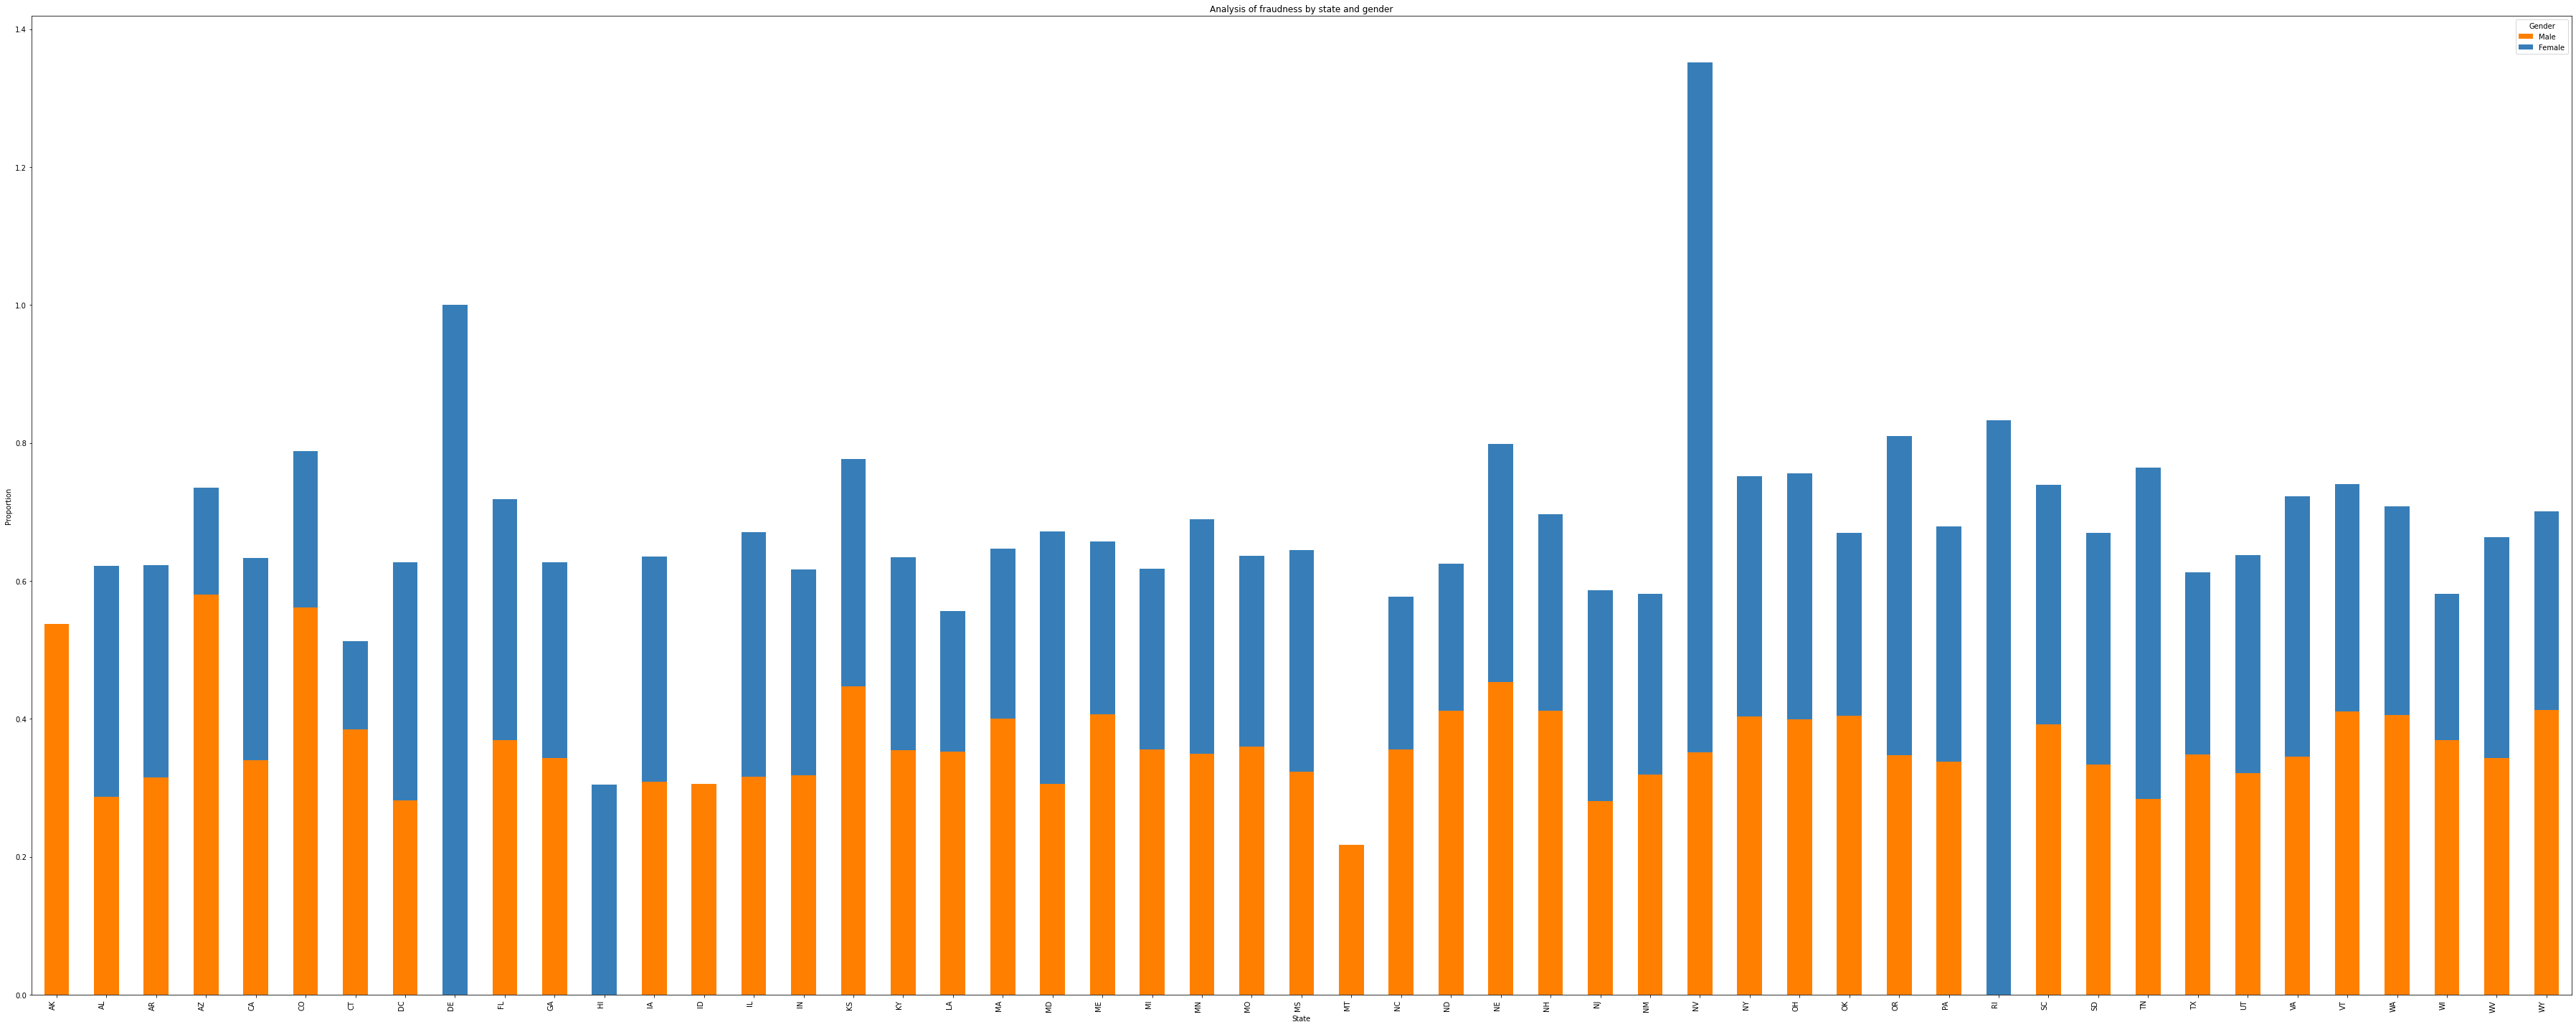

In [194]:
is_fraud_by_category = new_dataset.groupby(['state', 'gender'])['is_fraud'].mean().unstack()
#is_fraud_by_category = df.groupby(['state', 'gender'])['is_fraud']
fig, ax = plt.subplots(figsize=(50, 20))
is_fraud_by_category.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of fraudness by state and gender')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')  # Rotating 90 degrees for better readability
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

<Figure size 3600x1440 with 0 Axes>

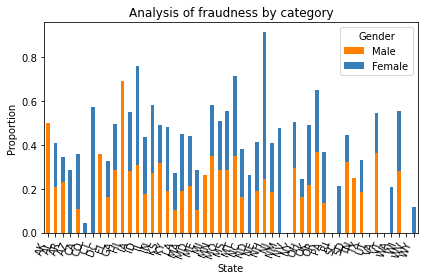

In [195]:
is_fraud_by_category = new_dataset_2.groupby(['state', 'gender'])['is_fraud'].mean().unstack()

plt.figure(figsize=(50, 20))
is_fraud_by_category.plot(kind = 'bar', stacked = True, color=['#ff7f00', '#377eb8'])
plt.title('Analysis of fraudness by category')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=70, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

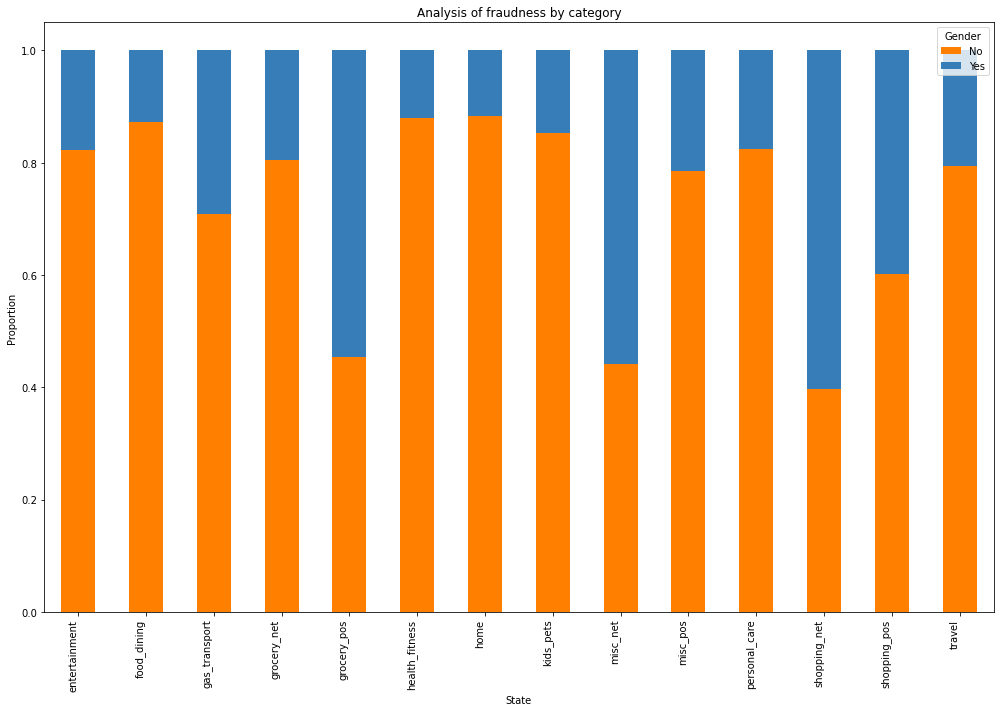

In [196]:
is_fraud_by_category = new_dataset.groupby('category')['is_fraud'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(figsize=(14,10))
is_fraud_by_category.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of fraudness by category')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')  # Rotating 90 degrees for better readability
plt.legend(title='Gender', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

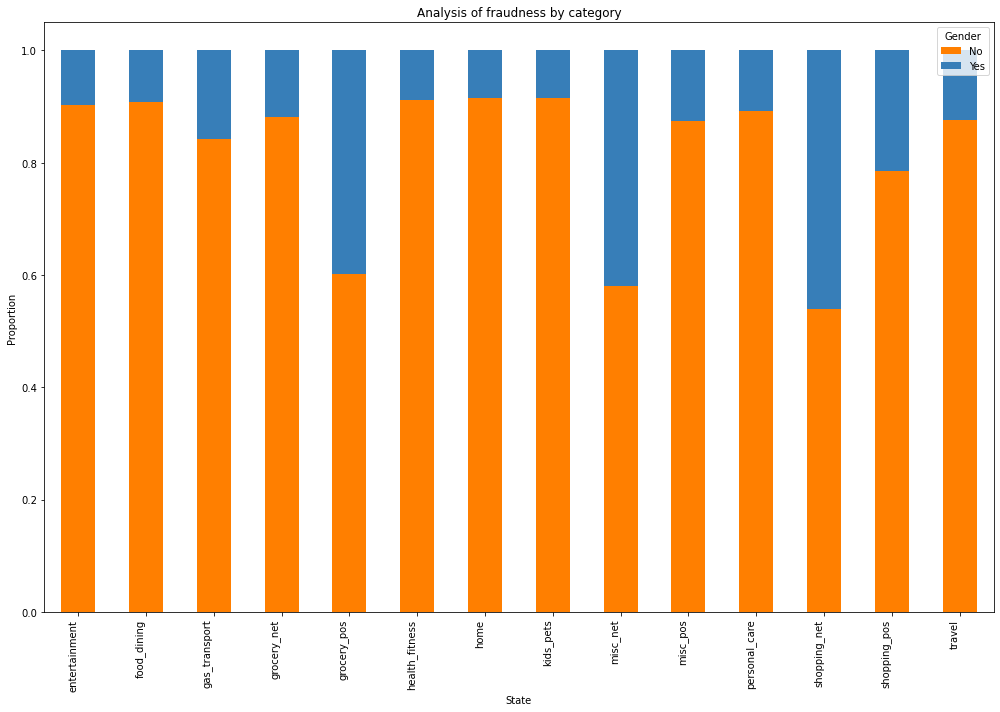

In [197]:
is_fraud_by_category = new_dataset_2.groupby('category')['is_fraud'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(figsize=(14,10))
is_fraud_by_category.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of fraudness by category')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')  # Rotating 90 degrees for better readability
plt.legend(title='Gender', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [198]:
new_dataset['full_name'] = new_dataset['first'] + ' ' + new_dataset['last']
print(new_dataset.head())

       transaction_date_time   credit_card_number  \
201654   2019-04-13 22:00:36  4769426683924058915   
476585   2019-07-28 13:23:02      371226440126102   
162674   2019-03-27 11:26:37     4169759661243568   
931336   2020-01-05 04:37:04     3565196229855512   
991552   2020-02-09 07:34:44  4560395181594436016   

                                 merchant       category     amt    first  \
201654  fraud_Larson, Quitzon and Spencer         travel    4.25   Andrea   
476585                  fraud_Waelchi Inc      kids_pets  130.14    Stacy   
162674  fraud_Schoen, Kuphal and Nitzsche    grocery_pos  103.09    Jamie   
931336                 fraud_Bailey-Morar    grocery_pos   59.40  Adriana   
991552          fraud_Ledner-Pfannerstill  gas_transport   69.81   Angela   

           last  gender                            street            city  \
201654     Cruz       1    26572 Hodge Villages Suite 512         Mifflin   
476585  Lambert       1  85430 Julie Trafficway Suite 792  Mulbe

In [199]:
new_dataset_2['full_name'] = new_dataset_2['first'] + ' ' + new_dataset_2['last']
print(new_dataset_2.head())

       transaction_date_time  credit_card_number  \
237593   2020-09-14 23:00:43    6011104316292105   
501503   2020-12-20 09:14:55    4610050989831291   
333061   2020-10-26 21:17:54    4859525594182537   
212402   2020-09-04 10:26:12        630423337322   
335740   2020-10-27 18:21:52     374238209524200   

                                  merchant        category     amt      first  \
237593    fraud_Swaniawski, Lowe and Robel    shopping_pos    9.01    Valerie   
501503                 fraud_Ankunding LLC    shopping_net   81.03      James   
333061                    fraud_Bednar Inc          travel    3.50    Rebecca   
212402               fraud_Vandervort-Funk     grocery_pos  125.87  Stephanie   
335740  fraud_Turcotte, Batz and Buckridge  health_fitness    4.49     Daniel   

            last  gender                        street           city  ...  \
237593     Davis       1   3861 Anderson Ramp Apt. 536  Drakes Branch  ...   
501503     Lynch       0     5155 Mary Commo

In [200]:
new_dataset

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,transaction_number,unix_time,merch_lat,merch_long,is_fraud,full_name
201654,2019-04-13 22:00:36,4769426683924058915,"fraud_Larson, Quitzon and Spencer",travel,4.25,Andrea,Cruz,1,26572 Hodge Villages Suite 512,Mifflin,...,-77.4001,1909,Mining engineer,1954-08-22,65c2e45a48925dda985dc89cf20b2592,1334354436,39.814943,-77.643320,0,Andrea Cruz
476585,2019-07-28 13:23:02,371226440126102,fraud_Waelchi Inc,kids_pets,130.14,Stacy,Lambert,1,85430 Julie Trafficway Suite 792,Mulberry Grove,...,-89.2463,1810,Race relations officer,1974-12-24,3a2ba79065a841132d9ff60ddf875755,1343481782,39.532547,-90.246223,0,Stacy Lambert
162674,2019-03-27 11:26:37,4169759661243568,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,103.09,Jamie,Carr,1,55363 Aaron Circle Suite 450,Lawn,...,-76.5380,213,Special educational needs teacher,1972-02-15,3be8da9d6520d02d50c12b07e6608d5f,1332847597,39.956378,-77.003213,0,Jamie Carr
931336,2020-01-05 04:37:04,3565196229855512,fraud_Bailey-Morar,grocery_pos,59.40,Adriana,Harvey,1,715 Joy Prairie,Unionville,...,-92.9951,3805,"Investment banker, corporate",1950-09-15,8b56ceda04f24d23192a76d093249d99,1357360624,39.758535,-93.468314,0,Adriana Harvey
991552,2020-02-09 07:34:44,4560395181594436016,fraud_Ledner-Pfannerstill,gas_transport,69.81,Angela,Taylor,1,6343 Ramirez Skyway Apt. 518,Lakeport,...,-122.9328,11256,Podiatrist,1972-10-18,9b174626bfc861ddda07abd4b5958540,1360395284,38.484698,-123.207673,0,Angela Taylor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,1,94225 Smith Springs Apt. 617,Vero Beach,...,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1,Ashley Cabrera
1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,1,94225 Smith Springs Apt. 617,Vero Beach,...,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1,Ashley Cabrera
1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,0,458 Phillips Island Apt. 768,Denham Springs,...,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1,William Perry
1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,1,63542 Luna Brook Apt. 012,Notrees,...,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1,Brooke Smith


In [201]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
237593,2020-09-14 23:00:43,6011104316292105,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.01,Valerie,Davis,1,3861 Anderson Ramp Apt. 536,Drakes Branch,...,-78.5615,1970,Energy engineer,1985-09-02,c63f7b47d0664e50c43bcb6661dcda95,1379199643,37.934830,-79.242468,0,Valerie Davis
501503,2020-12-20 09:14:55,4610050989831291,fraud_Ankunding LLC,shopping_net,81.03,James,Lynch,0,5155 Mary Common Apt. 927,Utica,...,-79.9403,1102,Garment/textile technologist,1989-07-08,63bdde0747d4eeceedd23e5f8e020e2c,1387530895,41.991466,-80.837813,0,James Lynch
333061,2020-10-26 21:17:54,4859525594182537,fraud_Bednar Inc,travel,3.50,Rebecca,Farley,1,383 Long Islands,Downsville,...,-75.0152,1228,"Psychotherapist, child",1990-02-25,10e2c890a0901ee5e20643057036b329,1382822274,42.855333,-74.286545,0,Rebecca Farley
212402,2020-09-04 10:26:12,630423337322,fraud_Vandervort-Funk,grocery_pos,125.87,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,6b0a62f3fed167a678b706f324693e87,1378290372,49.698374,-117.383846,0,Stephanie Gill
335740,2020-10-27 18:21:52,374238209524200,"fraud_Turcotte, Batz and Buckridge",health_fitness,4.49,Daniel,Martinez,0,8510 Acevedo Burgs,Kent,...,-120.6649,60,Museum education officer,1942-04-03,e1abef2ce01af6fd27aa20ae6c14a3a0,1382898112,45.946652,-120.771332,0,Daniel Martinez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1,Travis Daniel
517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1,Travis Daniel
517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1,Travis Daniel
517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,0,1327 Rose Causeway Apt. 610,Senatobia,...,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1,Travis Daniel


In [202]:
new_dataset['transaction_date_time'] = pd.to_datetime(new_dataset['transaction_date_time'])
new_dataset.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,transaction_number,unix_time,merch_lat,merch_long,is_fraud,full_name
201654,2019-04-13 22:00:36,4769426683924058915,"fraud_Larson, Quitzon and Spencer",travel,4.25,Andrea,Cruz,1,26572 Hodge Villages Suite 512,Mifflin,...,-77.4001,1909,Mining engineer,1954-08-22,65c2e45a48925dda985dc89cf20b2592,1334354436,39.814943,-77.643320,0,Andrea Cruz
476585,2019-07-28 13:23:02,371226440126102,fraud_Waelchi Inc,kids_pets,130.14,Stacy,Lambert,1,85430 Julie Trafficway Suite 792,Mulberry Grove,...,-89.2463,1810,Race relations officer,1974-12-24,3a2ba79065a841132d9ff60ddf875755,1343481782,39.532547,-90.246223,0,Stacy Lambert
162674,2019-03-27 11:26:37,4169759661243568,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,103.09,Jamie,Carr,1,55363 Aaron Circle Suite 450,Lawn,...,-76.5380,213,Special educational needs teacher,1972-02-15,3be8da9d6520d02d50c12b07e6608d5f,1332847597,39.956378,-77.003213,0,Jamie Carr
931336,2020-01-05 04:37:04,3565196229855512,fraud_Bailey-Morar,grocery_pos,59.40,Adriana,Harvey,1,715 Joy Prairie,Unionville,...,-92.9951,3805,"Investment banker, corporate",1950-09-15,8b56ceda04f24d23192a76d093249d99,1357360624,39.758535,-93.468314,0,Adriana Harvey
991552,2020-02-09 07:34:44,4560395181594436016,fraud_Ledner-Pfannerstill,gas_transport,69.81,Angela,Taylor,1,6343 Ramirez Skyway Apt. 518,Lakeport,...,-122.9328,11256,Podiatrist,1972-10-18,9b174626bfc861ddda07abd4b5958540,1360395284,38.484698,-123.207673,0,Angela Taylor


In [203]:
new_dataset['trans_year'] = new_dataset['transaction_date_time'].dt.year
new_dataset['trans_month'] = new_dataset['transaction_date_time'].dt.month
new_dataset['trans_day'] = new_dataset['transaction_date_time'].dt.day
new_dataset['trans_hour'] = new_dataset['transaction_date_time'].dt.hour
new_dataset['trans_minute'] = new_dataset['transaction_date_time'].dt.minute
new_dataset['trans_day_of_week'] = new_dataset['transaction_date_time'].dt.dayofweek
new_dataset['trans_week_of_year'] = new_dataset['transaction_date_time'].dt.isocalendar().week

# Display the first few rows to confirm the new features
new_dataset.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year
201654,2019-04-13 22:00:36,4769426683924058915,"fraud_Larson, Quitzon and Spencer",travel,4.25,Andrea,Cruz,1,26572 Hodge Villages Suite 512,Mifflin,...,-77.643320,0,Andrea Cruz,2019,4,13,22,0,5,15
476585,2019-07-28 13:23:02,371226440126102,fraud_Waelchi Inc,kids_pets,130.14,Stacy,Lambert,1,85430 Julie Trafficway Suite 792,Mulberry Grove,...,-90.246223,0,Stacy Lambert,2019,7,28,13,23,6,30
162674,2019-03-27 11:26:37,4169759661243568,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,103.09,Jamie,Carr,1,55363 Aaron Circle Suite 450,Lawn,...,-77.003213,0,Jamie Carr,2019,3,27,11,26,2,13
931336,2020-01-05 04:37:04,3565196229855512,fraud_Bailey-Morar,grocery_pos,59.40,Adriana,Harvey,1,715 Joy Prairie,Unionville,...,-93.468314,0,Adriana Harvey,2020,1,5,4,37,6,1
991552,2020-02-09 07:34:44,4560395181594436016,fraud_Ledner-Pfannerstill,gas_transport,69.81,Angela,Taylor,1,6343 Ramirez Skyway Apt. 518,Lakeport,...,-123.207673,0,Angela Taylor,2020,2,9,7,34,6,6


In [204]:
new_dataset['trans_minute'].value_counts()

26    434
23    425
36    410
57    407
37    403
45    397
24    394
35    393
2     393
28    392
46    392
51    392
34    391
59    387
50    384
17    384
48    382
56    381
58    381
55    381
10    381
4     379
0     379
27    379
40    377
11    377
31    376
44    376
38    372
54    372
9     372
3     371
43    371
15    370
49    370
12    370
42    369
8     367
21    367
5     367
20    367
18    367
41    366
14    366
52    365
13    364
16    363
7     361
53    361
47    361
25    357
6     357
22    356
30    354
29    351
32    350
39    349
19    345
1     345
33    336
Name: trans_minute, dtype: int64

In [205]:
new_dataset_2['transaction_date_time'] = pd.to_datetime(new_dataset_2['transaction_date_time'])
new_dataset_2.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
237593,2020-09-14 23:00:43,6011104316292105,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.01,Valerie,Davis,1,3861 Anderson Ramp Apt. 536,Drakes Branch,...,-78.5615,1970,Energy engineer,1985-09-02,c63f7b47d0664e50c43bcb6661dcda95,1379199643,37.934830,-79.242468,0,Valerie Davis
501503,2020-12-20 09:14:55,4610050989831291,fraud_Ankunding LLC,shopping_net,81.03,James,Lynch,0,5155 Mary Common Apt. 927,Utica,...,-79.9403,1102,Garment/textile technologist,1989-07-08,63bdde0747d4eeceedd23e5f8e020e2c,1387530895,41.991466,-80.837813,0,James Lynch
333061,2020-10-26 21:17:54,4859525594182537,fraud_Bednar Inc,travel,3.50,Rebecca,Farley,1,383 Long Islands,Downsville,...,-75.0152,1228,"Psychotherapist, child",1990-02-25,10e2c890a0901ee5e20643057036b329,1382822274,42.855333,-74.286545,0,Rebecca Farley
212402,2020-09-04 10:26:12,630423337322,fraud_Vandervort-Funk,grocery_pos,125.87,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,6b0a62f3fed167a678b706f324693e87,1378290372,49.698374,-117.383846,0,Stephanie Gill
335740,2020-10-27 18:21:52,374238209524200,"fraud_Turcotte, Batz and Buckridge",health_fitness,4.49,Daniel,Martinez,0,8510 Acevedo Burgs,Kent,...,-120.6649,60,Museum education officer,1942-04-03,e1abef2ce01af6fd27aa20ae6c14a3a0,1382898112,45.946652,-120.771332,0,Daniel Martinez


In [206]:
new_dataset_2['trans_year'] = new_dataset_2['transaction_date_time'].dt.year
new_dataset_2['trans_month'] = new_dataset_2['transaction_date_time'].dt.month
new_dataset_2['trans_day'] = new_dataset_2['transaction_date_time'].dt.day
new_dataset_2['trans_hour'] = new_dataset_2['transaction_date_time'].dt.hour
new_dataset_2['trans_minute'] = new_dataset_2['transaction_date_time'].dt.minute
new_dataset_2['trans_day_of_week'] = new_dataset_2['transaction_date_time'].dt.dayofweek
new_dataset_2['trans_week_of_year'] = new_dataset_2['transaction_date_time'].dt.isocalendar().week

# Display the first few rows to confirm the new features
new_dataset_2.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year
237593,2020-09-14 23:00:43,6011104316292105,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.01,Valerie,Davis,1,3861 Anderson Ramp Apt. 536,Drakes Branch,...,-79.242468,0,Valerie Davis,2020,9,14,23,0,0,38
501503,2020-12-20 09:14:55,4610050989831291,fraud_Ankunding LLC,shopping_net,81.03,James,Lynch,0,5155 Mary Common Apt. 927,Utica,...,-80.837813,0,James Lynch,2020,12,20,9,14,6,51
333061,2020-10-26 21:17:54,4859525594182537,fraud_Bednar Inc,travel,3.50,Rebecca,Farley,1,383 Long Islands,Downsville,...,-74.286545,0,Rebecca Farley,2020,10,26,21,17,0,44
212402,2020-09-04 10:26:12,630423337322,fraud_Vandervort-Funk,grocery_pos,125.87,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,-117.383846,0,Stephanie Gill,2020,9,4,10,26,4,36
335740,2020-10-27 18:21:52,374238209524200,"fraud_Turcotte, Batz and Buckridge",health_fitness,4.49,Daniel,Martinez,0,8510 Acevedo Burgs,Kent,...,-120.771332,0,Daniel Martinez,2020,10,27,18,21,1,44


In [207]:
new_dataset = new_dataset.sort_values(by=['credit_card_number', 'transaction_date_time'])
new_dataset['time_diff'] = new_dataset.groupby('credit_card_number')['transaction_date_time'].diff().dt.total_seconds()
new_dataset.head(20)

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,is_fraud,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff
48782,2019-01-29 12:11:27,60416207185,fraud_Pacocha-Weissnat,kids_pets,16.20,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2019,1,29,12,11,1,5,NaN
55345,2019-02-02 22:23:36,60416207185,"fraud_Willms, Kris and Bergnaum",shopping_pos,6.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2019,2,2,22,23,5,5,382329.0
102490,2019-03-01 01:32:53,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,1,1,32,4,9,2257757.0
102556,2019-03-01 02:42:25,60416207185,fraud_Cummings LLC,gas_transport,11.74,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,1,2,42,4,9,4172.0
104145,2019-03-01 23:06:58,60416207185,fraud_Labadie LLC,personal_care,19.16,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,1,23,6,4,9,73473.0
106627,2019-03-02 22:10:38,60416207185,fraud_Barrows PLC,shopping_pos,830.06,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,2,22,10,5,9,83020.0
106628,2019-03-02 22:10:59,60416207185,"fraud_Windler, Goodwin and Kovacek",home,261.79,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,2,22,10,5,9,21.0
106735,2019-03-02 23:01:54,60416207185,fraud_Douglas-White,entertainment,594.09,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,2,23,1,5,9,3055.0
106751,2019-03-02 23:08:08,60416207185,"fraud_Turner, Ziemann and Lehner",food_dining,130.08,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,2,23,8,5,9,374.0
106760,2019-03-02 23:11:08,60416207185,fraud_Parker-Kunde,personal_care,20.41,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,Mary Diaz,2019,3,2,23,11,5,9,180.0


In [208]:
new_dataset_2 = new_dataset_2.sort_values(by=['credit_card_number', 'transaction_date_time'])
new_dataset_2['time_diff'] = new_dataset_2.groupby('credit_card_number')['transaction_date_time'].diff().dt.total_seconds()
new_dataset_2.head(20)

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,is_fraud,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff
18590,2020-06-27 23:36:27,60416207185,fraud_Veum-Koelpin,travel,4.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,6,27,23,36,5,26,NaN
22755,2020-06-29 04:59:26,60416207185,fraud_Harris Inc,gas_transport,51.99,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,6,29,4,59,0,27,105779.0
27597,2020-06-30 11:27:12,60416207185,fraud_Cummerata-Jones,gas_transport,74.40,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,6,30,11,27,1,27,109666.0
112786,2020-07-30 15:47:54,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,2.30,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,7,30,15,47,3,31,2607642.0
133895,2020-08-07 05:29:34,60416207185,fraud_Conroy-Cruickshank,gas_transport,46.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,8,7,5,29,4,32,654100.0
136242,2020-08-08 05:25:11,60416207185,fraud_Bernhard Inc,gas_transport,25.65,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,8,8,5,25,5,32,86137.0
176982,2020-08-22 18:17:44,60416207185,fraud_Simonis-Prohaska,misc_pos,6.28,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,8,22,18,17,5,34,1255953.0
206088,2020-09-01 10:54:32,60416207185,fraud_Ortiz Group,grocery_net,53.71,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,9,1,10,54,1,36,837408.0
247277,2020-09-19 18:26:55,60416207185,fraud_Mosciski Group,travel,6.62,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,9,19,18,26,5,38,1582343.0
424898,2020-12-02 20:49:42,60416207185,fraud_Torp-Lemke,misc_pos,2.20,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,0,Mary Diaz,2020,12,2,20,49,2,49,6402167.0


In [209]:
new_dataset['transaction_date_time_utc'] = pd.to_datetime(new_dataset['transaction_date_time']).dt.tz_localize('UTC')

# Display the first few rows to confirm the conversion
print(new_dataset.head())

       transaction_date_time  credit_card_number  \
48782    2019-01-29 12:11:27         60416207185   
55345    2019-02-02 22:23:36         60416207185   
102490   2019-03-01 01:32:53         60416207185   
102556   2019-03-01 02:42:25         60416207185   
104145   2019-03-01 23:06:58         60416207185   

                               merchant       category    amt first  last  \
48782            fraud_Pacocha-Weissnat      kids_pets  16.20  Mary  Diaz   
55345   fraud_Willms, Kris and Bergnaum   shopping_pos   6.39  Mary  Diaz   
102490                  fraud_Marks Inc  gas_transport  13.17  Mary  Diaz   
102556               fraud_Cummings LLC  gas_transport  11.74  Mary  Diaz   
104145                fraud_Labadie LLC  personal_care  19.16  Mary  Diaz   

        gender            street           city  ...  full_name  trans_year  \
48782        1  9886 Anita Drive  Fort Washakie  ...  Mary Diaz        2019   
55345        1  9886 Anita Drive  Fort Washakie  ...  Mary Diaz   

In [210]:
new_dataset_2['transaction_date_time_utc'] = pd.to_datetime(new_dataset_2['transaction_date_time']).dt.tz_localize('UTC')

# Display the first few rows to confirm the conversion
print(new_dataset_2.head())

       transaction_date_time  credit_card_number  \
18590    2020-06-27 23:36:27         60416207185   
22755    2020-06-29 04:59:26         60416207185   
27597    2020-06-30 11:27:12         60416207185   
112786   2020-07-30 15:47:54         60416207185   
133895   2020-08-07 05:29:34         60416207185   

                                   merchant       category    amt first  last  \
18590                    fraud_Veum-Koelpin         travel   4.39  Mary  Diaz   
22755                      fraud_Harris Inc  gas_transport  51.99  Mary  Diaz   
27597                 fraud_Cummerata-Jones  gas_transport  74.40  Mary  Diaz   
112786  fraud_Douglas, Schneider and Turner   shopping_pos   2.30  Mary  Diaz   
133895             fraud_Conroy-Cruickshank  gas_transport  46.39  Mary  Diaz   

        gender            street           city  ...  full_name  trans_year  \
18590        1  9886 Anita Drive  Fort Washakie  ...  Mary Diaz        2020   
22755        1  9886 Anita Drive  Fort Was

In [211]:
new_dataset

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc
48782,2019-01-29 12:11:27,60416207185,fraud_Pacocha-Weissnat,kids_pets,16.20,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2019,1,29,12,11,1,5,NaN,2019-01-29 12:11:27+00:00
55345,2019-02-02 22:23:36,60416207185,"fraud_Willms, Kris and Bergnaum",shopping_pos,6.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2019,2,2,22,23,5,5,382329.0,2019-02-02 22:23:36+00:00
102490,2019-03-01 01:32:53,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2019,3,1,1,32,4,9,2257757.0,2019-03-01 01:32:53+00:00
102556,2019-03-01 02:42:25,60416207185,fraud_Cummings LLC,gas_transport,11.74,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2019,3,1,2,42,4,9,4172.0,2019-03-01 02:42:25+00:00
104145,2019-03-01 23:06:58,60416207185,fraud_Labadie LLC,personal_care,19.16,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2019,3,1,23,6,4,9,73473.0,2019-03-01 23:06:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980522,2020-02-02 15:38:58,4992346398065154184,"fraud_Hahn, Douglas and Schowalter",travel,9.04,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,2,2,15,38,6,5,2826752.0,2020-02-02 15:38:58+00:00
1028604,2020-03-02 10:10:40,4992346398065154184,fraud_Friesen Inc,shopping_pos,7.22,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,3,2,10,10,0,10,2485902.0,2020-03-02 10:10:40+00:00
1076031,2020-03-23 04:35:07,4992346398065154184,fraud_Klocko LLC,misc_net,302.79,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,3,23,4,35,0,13,1794267.0,2020-03-23 04:35:07+00:00
1171925,2020-05-04 10:47:28,4992346398065154184,fraud_Kiehn Inc,grocery_pos,121.37,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,5,4,10,47,0,19,3651141.0,2020-05-04 10:47:28+00:00


In [212]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,full_name,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc
18590,2020-06-27 23:36:27,60416207185,fraud_Veum-Koelpin,travel,4.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2020,6,27,23,36,5,26,NaN,2020-06-27 23:36:27+00:00
22755,2020-06-29 04:59:26,60416207185,fraud_Harris Inc,gas_transport,51.99,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2020,6,29,4,59,0,27,105779.0,2020-06-29 04:59:26+00:00
27597,2020-06-30 11:27:12,60416207185,fraud_Cummerata-Jones,gas_transport,74.40,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2020,6,30,11,27,1,27,109666.0,2020-06-30 11:27:12+00:00
112786,2020-07-30 15:47:54,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,2.30,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2020,7,30,15,47,3,31,2607642.0,2020-07-30 15:47:54+00:00
133895,2020-08-07 05:29:34,60416207185,fraud_Conroy-Cruickshank,gas_transport,46.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,Mary Diaz,2020,8,7,5,29,4,32,654100.0,2020-08-07 05:29:34+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338173,2020-10-29 00:20:44,4992346398065154184,"fraud_Stroman, Hudson and Erdman",gas_transport,57.04,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,10,29,0,20,3,44,832737.0,2020-10-29 00:20:44+00:00
402650,2020-11-26 15:55:21,4992346398065154184,"fraud_O'Reilly, Mohr and Purdy",home,36.88,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,11,26,15,55,3,48,2475277.0,2020-11-26 15:55:21+00:00
469117,2020-12-13 06:13:14,4992346398065154184,fraud_Hackett-Lueilwitz,grocery_pos,143.17,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,12,13,6,13,6,50,1433873.0,2020-12-13 06:13:14+00:00
514735,2020-12-22 13:59:17,4992346398065154184,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,87.24,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,Benjamin Kim,2020,12,22,13,59,1,52,805563.0,2020-12-22 13:59:17+00:00


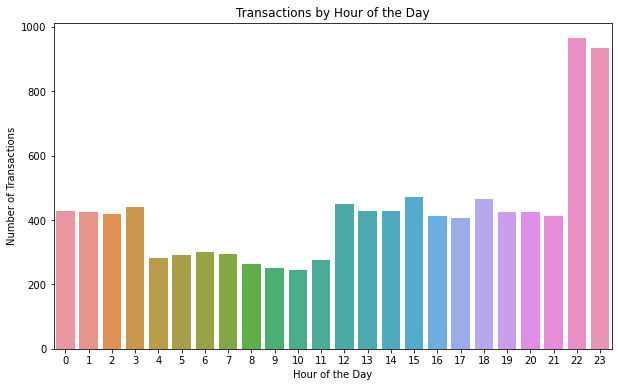

In [213]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_hour')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

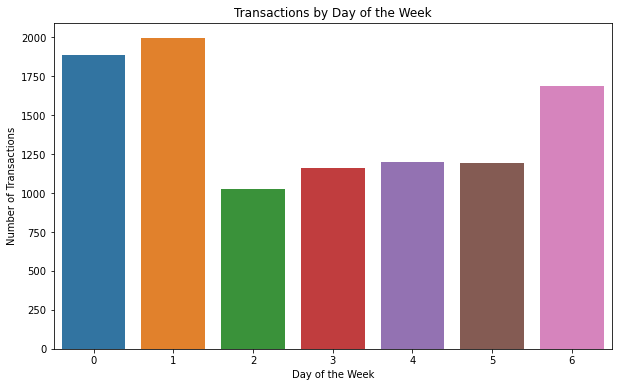

In [214]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_day_of_week')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

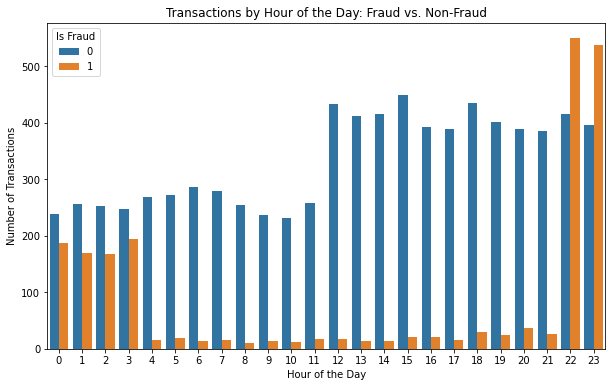

In [215]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_hour', hue='is_fraud')
plt.title('Transactions by Hour of the Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

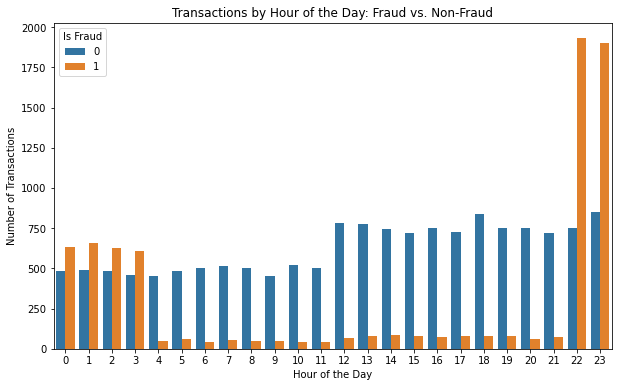

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='trans_hour', hue='is_fraud')
plt.title('Transactions by Hour of the Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

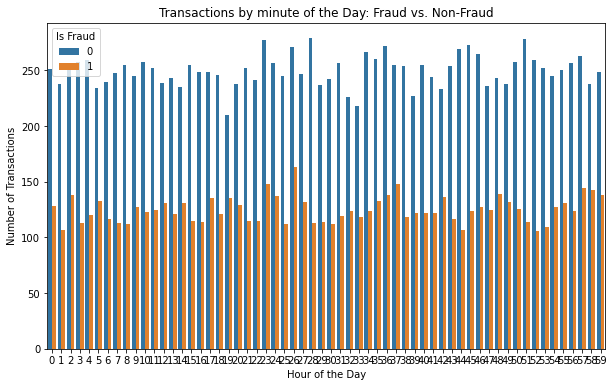

In [217]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='trans_minute', hue='is_fraud')
plt.title('Transactions by minute of the Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

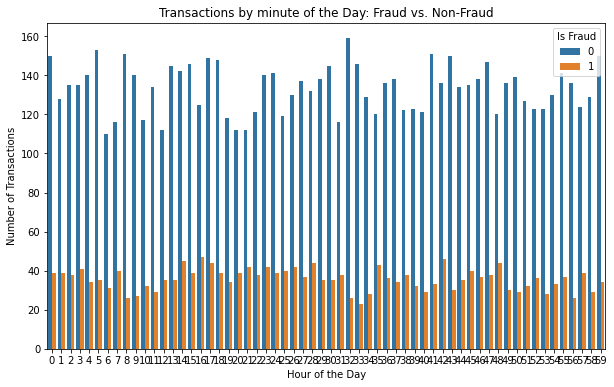

In [218]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_minute', hue='is_fraud')
plt.title('Transactions by minute of the Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

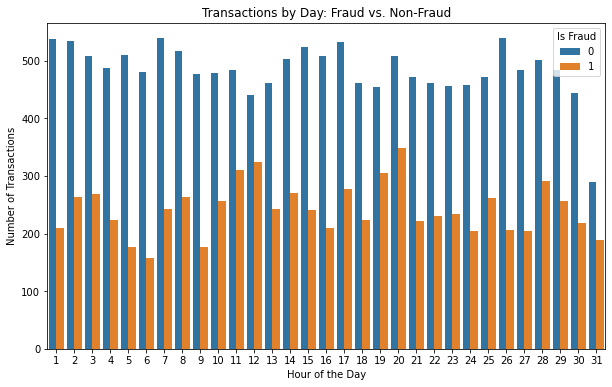

In [219]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='trans_day', hue='is_fraud')
plt.title('Transactions by Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

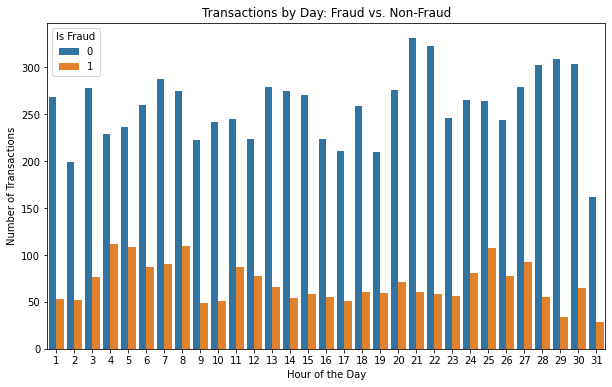

In [220]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_day', hue='is_fraud')
plt.title('Transactions by Day: Fraud vs. Non-Fraud')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

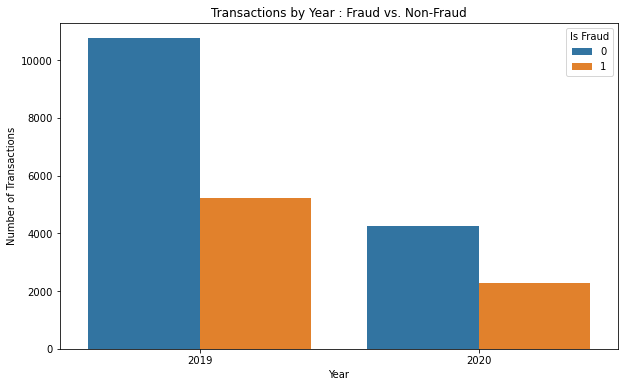

In [221]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='trans_year', hue='is_fraud')
plt.title('Transactions by Year : Fraud vs. Non-Fraud')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

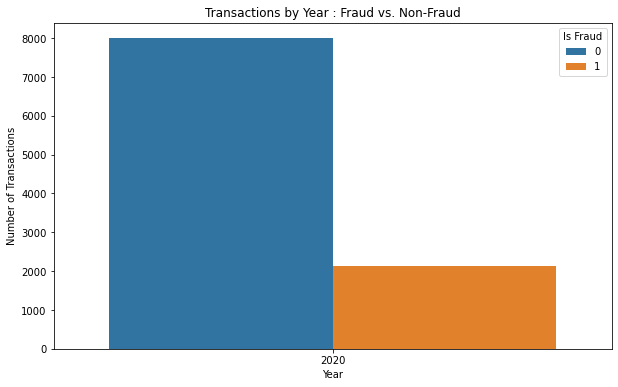

In [222]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_year', hue='is_fraud')
plt.title('Transactions by Year : Fraud vs. Non-Fraud')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

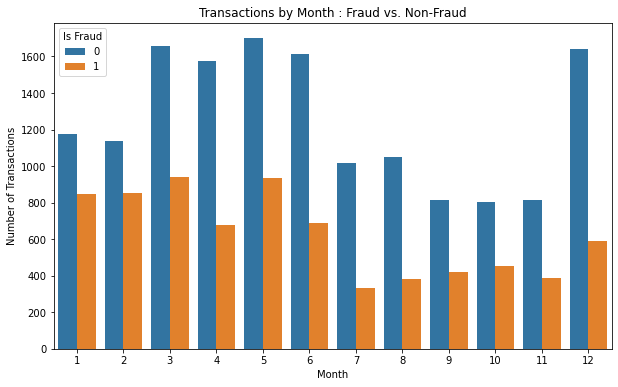

In [223]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset, x='trans_month', hue='is_fraud')
plt.title('Transactions by Month : Fraud vs. Non-Fraud')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

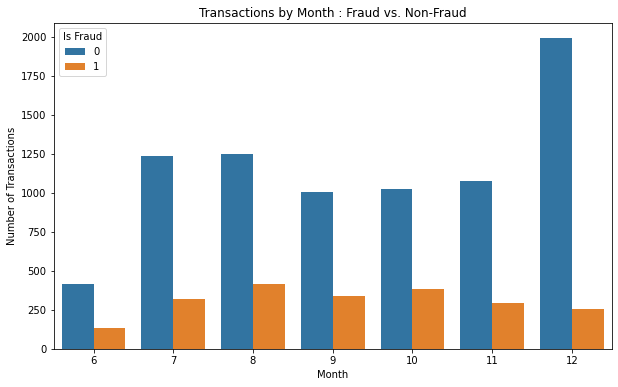

In [224]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_dataset_2, x='trans_month', hue='is_fraud')
plt.title('Transactions by Month : Fraud vs. Non-Fraud')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud')
plt.show()

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

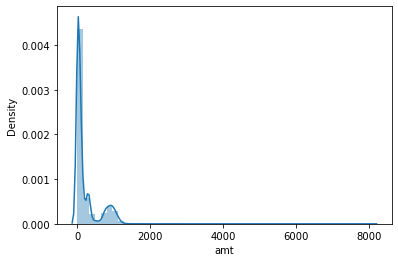

In [225]:
sns.distplot(new_dataset['amt'])

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

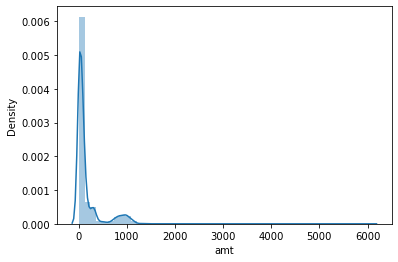

In [226]:
sns.distplot(new_dataset_2['amt'])

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_pop', ylabel='Density'>

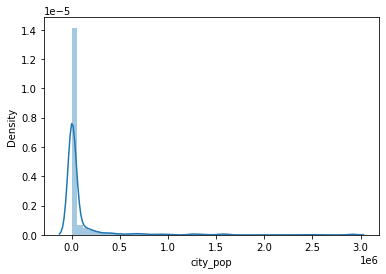

In [227]:
sns.distplot(new_dataset['city_pop'])

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_pop', ylabel='Density'>

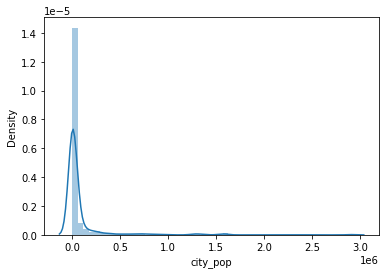

In [228]:
sns.distplot(new_dataset_2['city_pop'])

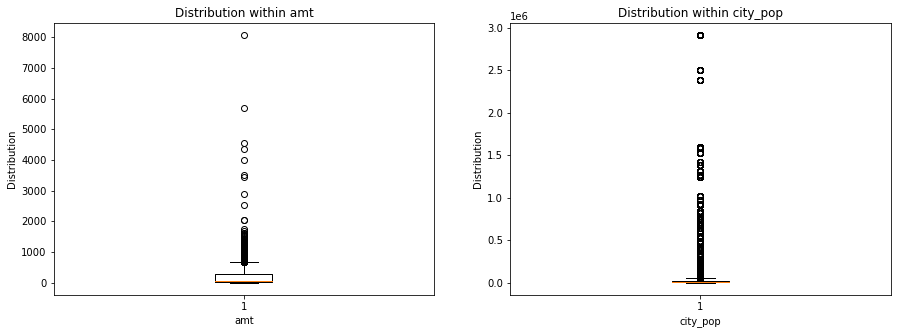

In [229]:
num_cols = ["amt", "city_pop"]

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(new_dataset[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

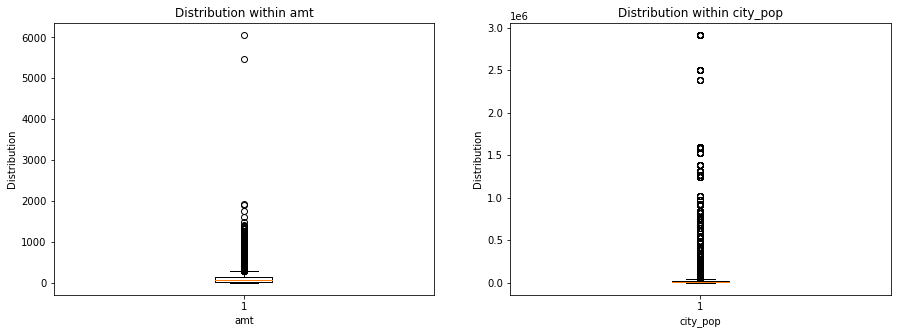

In [230]:
num_cols = ["amt", "city_pop"]

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(new_dataset_2[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

In [231]:
def outlier_replacement(column):
    #type 1 = IQR by default, else= median replacement
    # Get quartiles and IQR range
    Q1 = new_dataset[column].quantile(0.25)
    Q2 = new_dataset[column].quantile(0.50)
    Q3 = new_dataset[column].quantile(0.75)
    IQR = Q3 -Q1
    # Replace values with either medain or IQR min/max values
    # Replace outliers with median value
    new_dataset[column]= np.where(new_dataset[column]> (Q3 +1.5 * IQR), Q2, new_dataset[column])
    new_dataset[column] =np.where(new_dataset[column]< (Q1 -1.5 *IQR), Q2, new_dataset[column])

outlier_replacement("amt")
outlier_replacement("city_pop")

In [232]:
def outlier_replacement(column):
    #type 1 = IQR by default, else= median replacement
    # Get quartiles and IQR range
    Q1 = new_dataset_2[column].quantile(0.25)
    Q2 = new_dataset_2[column].quantile(0.50)
    Q3 = new_dataset_2[column].quantile(0.75)
    IQR = Q3 -Q1
    # Replace values with either medain or IQR min/max values
    # Replace outliers with median value
    new_dataset_2[column]= np.where(new_dataset_2[column]> (Q3 +1.5 * IQR), Q2, new_dataset_2[column])
    new_dataset_2[column] =np.where(new_dataset_2[column]< (Q1 -1.5 * IQR), Q2, new_dataset_2[column])

outlier_replacement("amt")
outlier_replacement("city_pop")

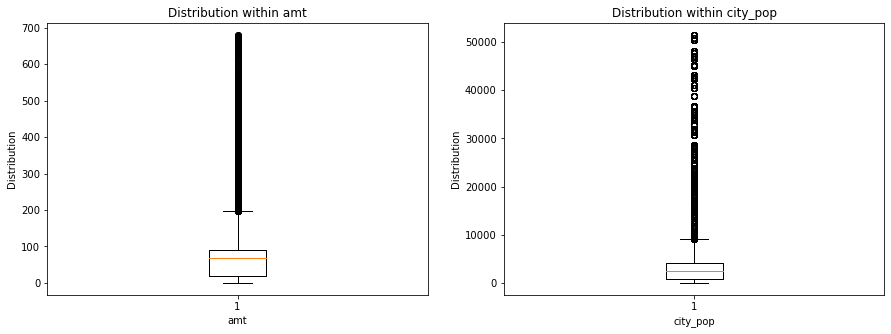

In [233]:
num_cols = ["amt", "city_pop"]

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(new_dataset[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

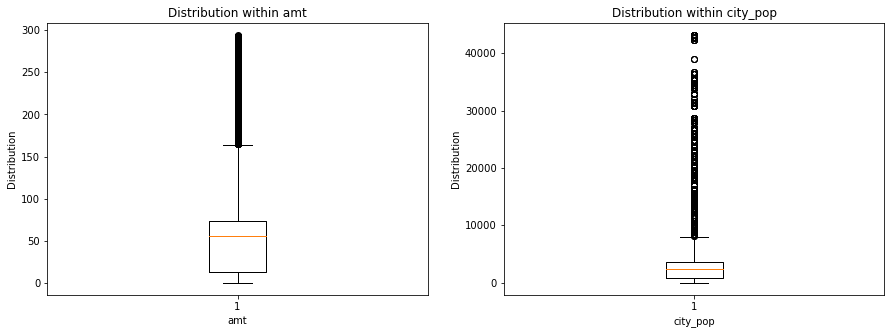

In [234]:
num_cols = ["amt", "city_pop"]

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))

for i, feature in enumerate(num_cols):
    ax[i].boxplot(new_dataset_2[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

In [235]:
def get_aggregates(column):
    price_avg = np.mean(new_dataset[column])
    price_std = np.std(new_dataset[column])
    unique_count = len(new_dataset[column].unique())
    print("\n - " + column + ":")
    print("Mean: ", price_avg)
    print("Median: ", np.median(new_dataset[column]))
    print("Mode: ", stats.mode(new_dataset[column]))
    print("Standard Deviation: ", price_std)
    print("Unique values: " + str(unique_count))

for column in num_cols:
    get_aggregates(column)


 - amt:
Mean:  87.44853328001454
Median:  66.995
Mode:  67.0
Standard Deviation:  107.26835619412
Unique values: 11164

 - city_pop:
Mean:  5012.879365502533
Median:  2518.0
Mode:  2518.0
Standard Deviation:  8766.543981015448
Unique values: 735


In [236]:
def get_aggregates(column):
    price_avg = np.mean(new_dataset_2[column])
    price_std = np.std(new_dataset_2[column])
    unique_count = len(new_dataset_2[column].unique())
    print("\n - " + column + ":")
    print("Mean: ", price_avg)
    print("Median: ", np.median(new_dataset_2[column]))
    print("Mode: ", stats.mode(new_dataset_2[column]))
    print("Standard Deviation: ", price_std)
    print("Unique values: " + str(unique_count))

for column in num_cols:
    get_aggregates(column)


 - amt:
Mean:  57.70596550024551
Median:  56.66
Mode:  56.66
Standard Deviation:  54.890552348725954
Unique values: 5927

 - city_pop:
Mean:  4215.494233612617
Median:  2408.0
Mode:  2408.0
Standard Deviation:  6858.147211108629
Unique values: 684


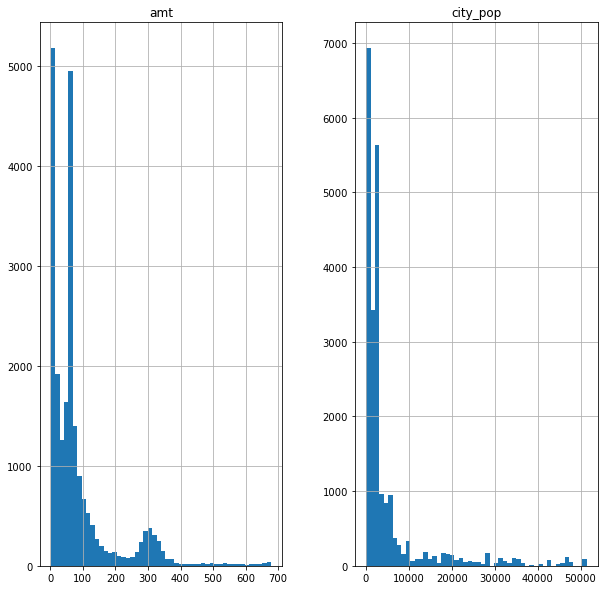

In [237]:
new_dataset[num_cols].hist(bins=50, figsize=(10, 10))
plt.show()

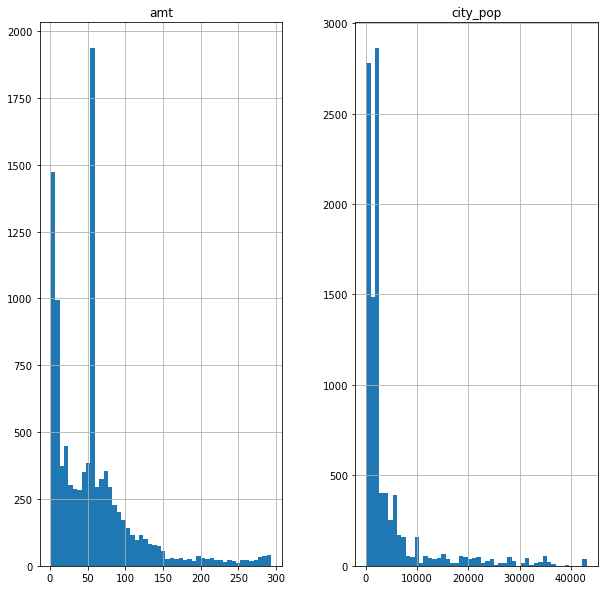

In [238]:
new_dataset_2[num_cols].hist(bins=50, figsize=(10, 10))
plt.show()

In [239]:
import re
new_dataset['street_number'] = new_dataset['street'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)
new_dataset['street_name'] = new_dataset['street'].apply(lambda x: ' '.join(re.findall(r'[^\d]+', x)).strip())
new_dataset['has_apt'] = new_dataset['street'].apply(lambda x: 1 if 'Apt.' in x else 0)

In [240]:
import re
new_dataset_2['street_number'] = new_dataset_2['street'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)
new_dataset_2['street_name'] = new_dataset_2['street'].apply(lambda x: ' '.join(re.findall(r'[^\d]+', x)).strip())
new_dataset_2['has_apt'] = new_dataset_2['street'].apply(lambda x: 1 if 'Apt.' in x else 0)

In [241]:
new_dataset

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
48782,2019-01-29 12:11:27,60416207185,fraud_Pacocha-Weissnat,kids_pets,16.20,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,29,12,11,1,5,NaN,2019-01-29 12:11:27+00:00,9886,Anita Drive,0
55345,2019-02-02 22:23:36,60416207185,"fraud_Willms, Kris and Bergnaum",shopping_pos,6.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,2,22,23,5,5,382329.0,2019-02-02 22:23:36+00:00,9886,Anita Drive,0
102490,2019-03-01 01:32:53,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,1,32,4,9,2257757.0,2019-03-01 01:32:53+00:00,9886,Anita Drive,0
102556,2019-03-01 02:42:25,60416207185,fraud_Cummings LLC,gas_transport,11.74,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,2,42,4,9,4172.0,2019-03-01 02:42:25+00:00,9886,Anita Drive,0
104145,2019-03-01 23:06:58,60416207185,fraud_Labadie LLC,personal_care,19.16,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,1,23,6,4,9,73473.0,2019-03-01 23:06:58+00:00,9886,Anita Drive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980522,2020-02-02 15:38:58,4992346398065154184,"fraud_Hahn, Douglas and Schowalter",travel,9.04,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,2,15,38,6,5,2826752.0,2020-02-02 15:38:58+00:00,920,Patrick Light,0
1028604,2020-03-02 10:10:40,4992346398065154184,fraud_Friesen Inc,shopping_pos,7.22,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,2,10,10,0,10,2485902.0,2020-03-02 10:10:40+00:00,920,Patrick Light,0
1076031,2020-03-23 04:35:07,4992346398065154184,fraud_Klocko LLC,misc_net,302.79,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,23,4,35,0,13,1794267.0,2020-03-23 04:35:07+00:00,920,Patrick Light,0
1171925,2020-05-04 10:47:28,4992346398065154184,fraud_Kiehn Inc,grocery_pos,121.37,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,4,10,47,0,19,3651141.0,2020-05-04 10:47:28+00:00,920,Patrick Light,0


In [242]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
18590,2020-06-27 23:36:27,60416207185,fraud_Veum-Koelpin,travel,4.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,27,23,36,5,26,NaN,2020-06-27 23:36:27+00:00,9886,Anita Drive,0
22755,2020-06-29 04:59:26,60416207185,fraud_Harris Inc,gas_transport,51.99,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,29,4,59,0,27,105779.0,2020-06-29 04:59:26+00:00,9886,Anita Drive,0
27597,2020-06-30 11:27:12,60416207185,fraud_Cummerata-Jones,gas_transport,74.40,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,30,11,27,1,27,109666.0,2020-06-30 11:27:12+00:00,9886,Anita Drive,0
112786,2020-07-30 15:47:54,60416207185,"fraud_Douglas, Schneider and Turner",shopping_pos,2.30,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,30,15,47,3,31,2607642.0,2020-07-30 15:47:54+00:00,9886,Anita Drive,0
133895,2020-08-07 05:29:34,60416207185,fraud_Conroy-Cruickshank,gas_transport,46.39,Mary,Diaz,1,9886 Anita Drive,Fort Washakie,...,7,5,29,4,32,654100.0,2020-08-07 05:29:34+00:00,9886,Anita Drive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338173,2020-10-29 00:20:44,4992346398065154184,"fraud_Stroman, Hudson and Erdman",gas_transport,57.04,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,29,0,20,3,44,832737.0,2020-10-29 00:20:44+00:00,920,Patrick Light,0
402650,2020-11-26 15:55:21,4992346398065154184,"fraud_O'Reilly, Mohr and Purdy",home,36.88,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,26,15,55,3,48,2475277.0,2020-11-26 15:55:21+00:00,920,Patrick Light,0
469117,2020-12-13 06:13:14,4992346398065154184,fraud_Hackett-Lueilwitz,grocery_pos,143.17,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,13,6,13,6,50,1433873.0,2020-12-13 06:13:14+00:00,920,Patrick Light,0
514735,2020-12-22 13:59:17,4992346398065154184,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,87.24,Benjamin,Kim,0,920 Patrick Light,Mc Nabb,...,22,13,59,1,52,805563.0,2020-12-22 13:59:17+00:00,920,Patrick Light,0


In [243]:
new_dataset['street_number'].value_counts()

144      91
561      83
250      82
663      73
062      69
         ..
295       2
3316      2
87198     1
610       1
0638      1
Name: street_number, Length: 930, dtype: int64

In [244]:
new_dataset_2['street_number'].value_counts()

622      63
144      56
8030     49
574      45
444      45
         ..
92213     1
6993      1
89297     1
58761     1
5278      1
Name: street_number, Length: 868, dtype: int64

In [245]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['merchant', 'category', 'city', 'state', 'job', 'street_name']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    new_dataset[col] = le.fit_transform(new_dataset[col])
    label_encoders[col] = le

In [246]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['merchant', 'category', 'city', 'state', 'job', 'street_name']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    new_dataset_2[col] = le.fit_transform(new_dataset_2[col])
    label_encoders[col] = le

In [247]:
new_dataset.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
48782,2019-01-29 12:11:27,60416207185,469,7,16.20,Mary,Diaz,1,9886 Anita Drive,272,...,29,12,11,1,5,NaN,2019-01-29 12:11:27+00:00,9886,42,0
55345,2019-02-02 22:23:36,60416207185,670,12,6.39,Mary,Diaz,1,9886 Anita Drive,272,...,2,22,23,5,5,382329.0,2019-02-02 22:23:36+00:00,9886,42,0
102490,2019-03-01 01:32:53,60416207185,407,2,13.17,Mary,Diaz,1,9886 Anita Drive,272,...,1,1,32,4,9,2257757.0,2019-03-01 01:32:53+00:00,9886,42,0
102556,2019-03-01 02:42:25,60416207185,119,2,11.74,Mary,Diaz,1,9886 Anita Drive,272,...,1,2,42,4,9,4172.0,2019-03-01 02:42:25+00:00,9886,42,0
104145,2019-03-01 23:06:58,60416207185,366,10,19.16,Mary,Diaz,1,9886 Anita Drive,272,...,1,23,6,4,9,73473.0,2019-03-01 23:06:58+00:00,9886,42,0


In [248]:
new_dataset_2

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
18590,2020-06-27 23:36:27,60416207185,646,13,4.39,Mary,Diaz,1,9886 Anita Drive,258,...,27,23,36,5,26,NaN,2020-06-27 23:36:27+00:00,9886,37,0
22755,2020-06-29 04:59:26,60416207185,231,2,51.99,Mary,Diaz,1,9886 Anita Drive,258,...,29,4,59,0,27,105779.0,2020-06-29 04:59:26+00:00,9886,37,0
27597,2020-06-30 11:27:12,60416207185,117,2,74.40,Mary,Diaz,1,9886 Anita Drive,258,...,30,11,27,1,27,109666.0,2020-06-30 11:27:12+00:00,9886,37,0
112786,2020-07-30 15:47:54,60416207185,144,12,2.30,Mary,Diaz,1,9886 Anita Drive,258,...,30,15,47,3,31,2607642.0,2020-07-30 15:47:54+00:00,9886,37,0
133895,2020-08-07 05:29:34,60416207185,103,2,46.39,Mary,Diaz,1,9886 Anita Drive,258,...,7,5,29,4,32,654100.0,2020-08-07 05:29:34+00:00,9886,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338173,2020-10-29 00:20:44,4992346398065154184,607,2,57.04,Benjamin,Kim,0,920 Patrick Light,468,...,29,0,20,3,44,832737.0,2020-10-29 00:20:44+00:00,920,651,0
402650,2020-11-26 15:55:21,4992346398065154184,461,6,36.88,Benjamin,Kim,0,920 Patrick Light,468,...,26,15,55,3,48,2475277.0,2020-11-26 15:55:21+00:00,920,651,0
469117,2020-12-13 06:13:14,4992346398065154184,217,4,143.17,Benjamin,Kim,0,920 Patrick Light,468,...,13,6,13,6,50,1433873.0,2020-12-13 06:13:14+00:00,920,651,0
514735,2020-12-22 13:59:17,4992346398065154184,611,5,87.24,Benjamin,Kim,0,920 Patrick Light,468,...,22,13,59,1,52,805563.0,2020-12-22 13:59:17+00:00,920,651,0


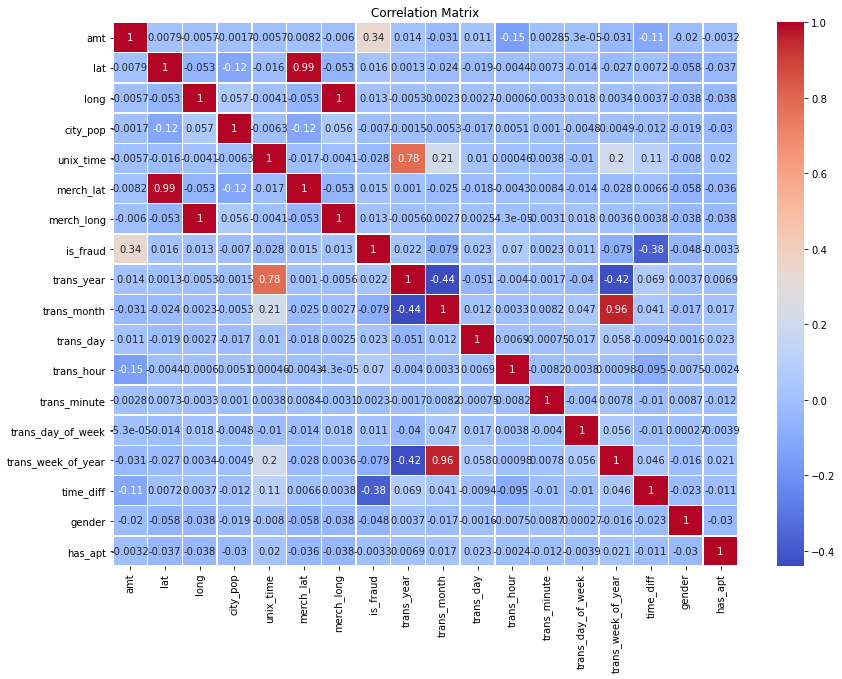

In [249]:
correlation_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                       'merch_long', 'is_fraud', 'trans_year', 'trans_month', 
                       'trans_day', 'trans_hour', 'trans_minute', 'trans_day_of_week', 
                       'trans_week_of_year', 'time_diff', 'gender', 'has_apt']

correlation_matrix = new_dataset[correlation_columns].corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

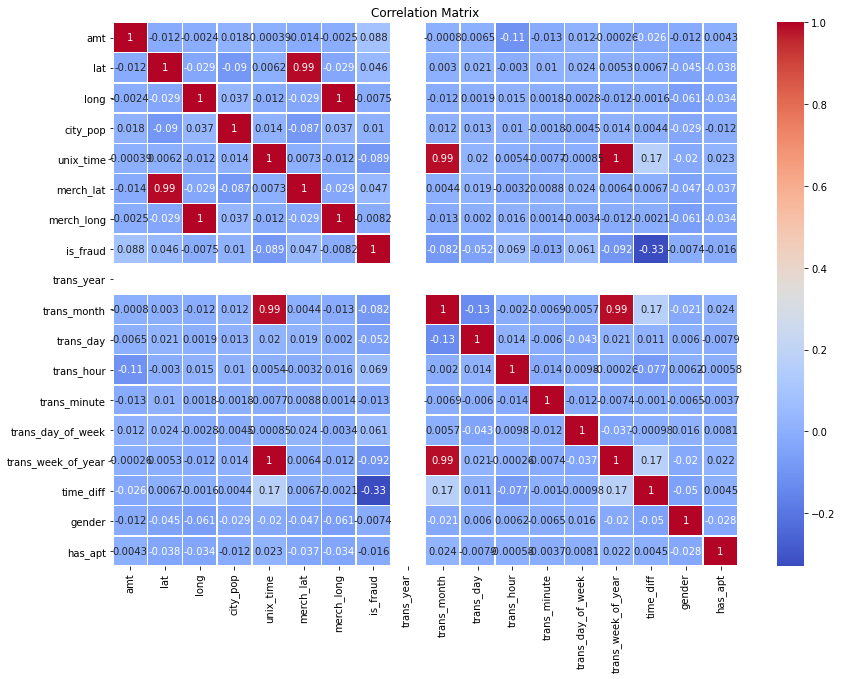

In [250]:
correlation_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                       'merch_long', 'is_fraud', 'trans_year', 'trans_month', 
                       'trans_day', 'trans_hour', 'trans_minute', 'trans_day_of_week', 
                       'trans_week_of_year', 'time_diff', 'gender', 'has_apt']

correlation_matrix = new_dataset_2[correlation_columns].corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [251]:
new_dataset.dtypes

transaction_date_time             datetime64[ns]
credit_card_number                         int64
merchant                                   int32
category                                   int32
amt                                      float64
first                                     object
last                                      object
gender                                     int64
street                                    object
city                                       int32
state                                      int32
zip                                        int64
lat                                      float64
long                                     float64
city_pop                                 float64
job                                        int32
dob                                       object
transaction_number                        object
unix_time                                  int64
merch_lat                                float64
merch_long          

In [252]:
new_dataset_2.dtypes

transaction_date_time             datetime64[ns]
credit_card_number                         int64
merchant                                   int32
category                                   int32
amt                                      float64
first                                     object
last                                      object
gender                                     int64
street                                    object
city                                       int32
state                                      int32
zip                                        int64
lat                                      float64
long                                     float64
city_pop                                 float64
job                                        int32
dob                                       object
trans_num                                 object
unix_time                                  int64
merch_lat                                float64
merch_long          

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

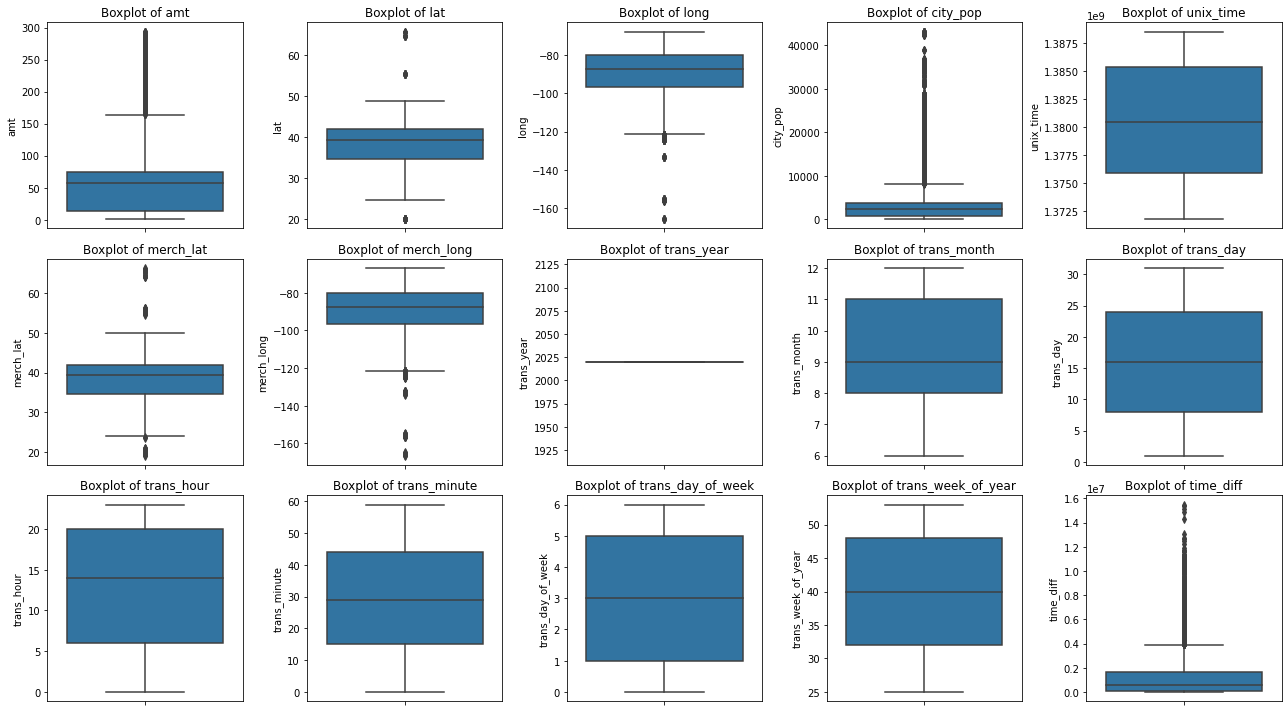

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
columns_to_plot = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                   'merch_long', 'trans_year', 'trans_month', 'trans_day', 
                   'trans_hour', 'trans_minute', 'trans_day_of_week', 
                   'trans_week_of_year', 'time_diff']

# Set up the plot
plt.figure(figsize=(18, 10))

# Create boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)  # Adjust the grid size as needed
    sns.boxplot(y=new_dataset_2[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjusts subplots to give some padding
plt.show()

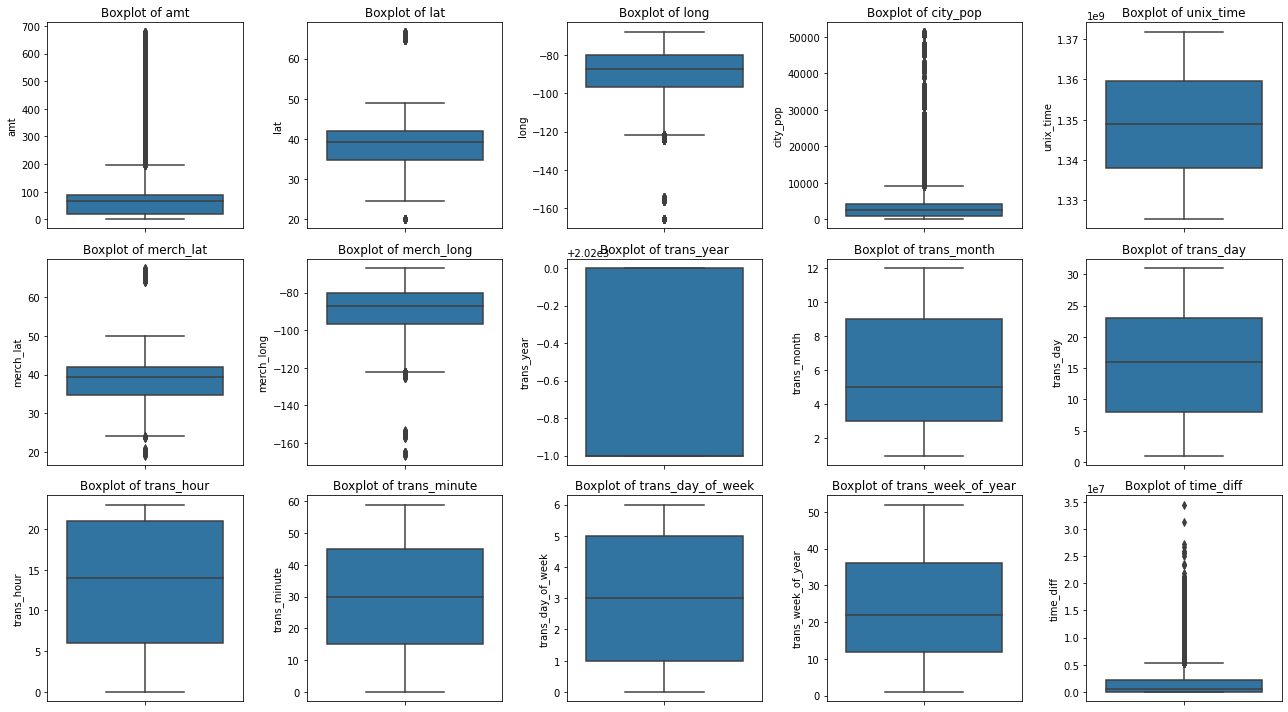

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
columns_to_plot = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                   'merch_long', 'trans_year', 'trans_month', 'trans_day', 
                   'trans_hour', 'trans_minute', 'trans_day_of_week', 
                   'trans_week_of_year', 'time_diff']

# Set up the plot
plt.figure(figsize=(18, 10))

# Create boxplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 5, i)  # Adjust the grid size as needed
    sns.boxplot(y=new_dataset[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjusts subplots to give some padding
plt.show()

In [256]:
columns_to_scale = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                    'merch_long', 'trans_year', 'trans_month', 'trans_day', 
                    'trans_hour', 'trans_minute', 'trans_day_of_week', 
                    'trans_week_of_year', 'time_diff']

# Instantiate the scaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
new_dataset_2[columns_to_scale] = scaler.fit_transform(new_dataset_2[columns_to_scale])

# Display the first few rows to verify the scaling
new_dataset_2.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
18590,2020-06-27 23:36:27,60416207185,646,13,-0.971314,Mary,Diaz,1,9886 Anita Drive,258,...,1.230899,1.324231,0.382215,1.025305,-1.638309,NaN,2020-06-27 23:36:27+00:00,9886,37,0
22755,2020-06-29 04:59:26,60416207185,231,2,-0.104134,Mary,Diaz,1,9886 Anita Drive,258,...,1.455338,-1.214985,1.710724,-1.304724,-1.519105,-0.642057,2020-06-29 04:59:26+00:00,9886,37,0
27597,2020-06-30 11:27:12,60416207185,117,2,0.304133,Mary,Diaz,1,9886 Anita Drive,258,...,1.567558,-0.279484,-0.137636,-0.838719,-1.519105,-0.639820,2020-06-30 11:27:12+00:00,9886,37,0
112786,2020-07-30 15:47:54,60416207185,144,12,-1.009390,Mary,Diaz,1,9886 Anita Drive,258,...,1.567558,0.255087,1.017589,0.093293,-1.042288,0.797886,2020-07-30 15:47:54+00:00,9886,37,0
133895,2020-08-07 05:29:34,60416207185,103,2,-0.206155,Mary,Diaz,1,9886 Anita Drive,258,...,-1.013495,-1.081342,-0.022114,0.559299,-0.923084,-0.326472,2020-08-07 05:29:34+00:00,9886,37,0


In [257]:
columns_to_scale = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 
                    'merch_long', 'trans_year', 'trans_month', 'trans_day', 
                    'trans_hour', 'trans_minute', 'trans_day_of_week', 
                    'trans_week_of_year', 'time_diff']

# Instantiate the scaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
new_dataset[columns_to_scale] = scaler.fit_transform(new_dataset[columns_to_scale])

# Display the first few rows to verify the scaling
new_dataset.head()

,transaction_date_time,credit_card_number,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_hour,trans_minute,trans_day_of_week,trans_week_of_year,time_diff,transaction_date_time_utc,street_number,street_name,has_apt
48782,2019-01-29 12:11:27,60416207185,469,7,-0.664208,Mary,Diaz,1,9886 Anita Drive,272,...,1.502021,-0.159350,-1.077959,-0.970270,-1.276431,NaN,2019-01-29 12:11:27+00:00,9886,42,0
55345,2019-02-02 22:23:36,60416207185,670,12,-0.755661,Mary,Diaz,1,9886 Anita Drive,272,...,-1.557065,1.106025,-0.385205,0.889376,-1.276431,-0.481450,2019-02-02 22:23:36+00:00,9886,42,0
102490,2019-03-01 01:32:53,60416207185,407,2,-0.692455,Mary,Diaz,1,9886 Anita Drive,272,...,-1.670364,-1.551262,0.134361,0.424465,-1.007897,0.247239,2019-03-01 01:32:53+00:00,9886,42,0
102556,2019-03-01 02:42:25,60416207185,119,2,-0.705786,Mary,Diaz,1,9886 Anita Drive,272,...,-1.670364,-1.424724,0.711656,0.424465,-1.007897,-0.628381,2019-03-01 02:42:25+00:00,9886,42,0
104145,2019-03-01 23:06:58,60416207185,366,10,-0.636614,Mary,Diaz,1,9886 Anita Drive,272,...,-1.670364,1.232562,-1.366606,0.424465,-1.007897,-0.601455,2019-03-01 23:06:58+00:00,9886,42,0


In [258]:
scaler.mean_

array([ 8.74485333e+01,  3.85504105e+01, -9.01781417e+01,  5.01287937e+03,
        1.34891625e+09,  3.85466251e+01, -9.01786344e+01,  2.01929014e+03,
        5.97089665e+00,  1.57429130e+01,  1.32593086e+01,  2.96725762e+01,
        3.08699902e+00,  2.40133298e+01,  1.62143800e+06])

In [259]:
scaler.scale_

array([1.07268356e+02, 5.13745836e+00, 1.39727191e+01, 8.76654398e+03,
       1.31318030e+07, 5.17719480e+00, 1.39882330e+01, 4.53829060e-01,
       3.43925681e+00, 8.82616587e+00, 7.90279824e+00, 1.73221655e+01,
       2.15094704e+00, 1.48956977e+01, 2.57370192e+06])

In [260]:
X = new_dataset[['credit_card_number', 'merchant', 'category', 'amt', 'city', 'state', 'zip', 'job']].values
Y = new_dataset['is_fraud'].values

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 20)

In [262]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [263]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [264]:
X_train_prediction = logreg.predict(X_train)
X_train_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
X_test_prediction = logreg.predict(X_test)
X_test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [266]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [267]:
print('Accuracy_score:', training_data_accuracy)

Accuracy_score: 0.6655743168184848


In [268]:
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.6701466015104398


In [269]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [270]:
cr = classification_report(y_test, X_test_prediction)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      3017
           1       0.00      0.00      0.00      1485

    accuracy                           0.67      4502
   macro avg       0.34      0.50      0.40      4502
weighted avg       0.45      0.67      0.54      4502



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [272]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [273]:
X_train_pred = knn.predict(X_train)
X_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [274]:
training_data_acc = accuracy_score(X_train_pred, y_train)
training_data_acc

0.7502777160630971

In [275]:
X_test_pred = knn.predict(X_test)
X_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [276]:
test_data_acc = accuracy_score(X_test_pred, y_test)
test_data_acc

0.7023545091070635

In [277]:
cr = classification_report(y_test, X_test_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80      3017
           1       0.59      0.32      0.41      1485

    accuracy                           0.70      4502
   macro avg       0.66      0.61      0.61      4502
weighted avg       0.68      0.70      0.67      4502



In [349]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      4470
           1       0.47      0.60      0.53      2282

    accuracy                           0.64      6752
   macro avg       0.62      0.63      0.62      6752
weighted avg       0.66      0.64      0.65      6752



In [350]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_rus, y_train_rus)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      4470
           1       0.47      0.67      0.55      2282

    accuracy                           0.63      6752
   macro avg       0.63      0.64      0.62      6752
weighted avg       0.68      0.63      0.64      6752



In [351]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_ros, y_train_ros)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      4470
           1       0.47      0.63      0.54      2282

    accuracy                           0.63      6752
   macro avg       0.62      0.63      0.62      6752
weighted avg       0.67      0.63      0.64      6752



In [352]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_adasyn, y_train_adasyn)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      4470
           1       0.46      0.67      0.54      2282

    accuracy                           0.62      6752
   macro avg       0.62      0.63      0.61      6752
weighted avg       0.67      0.62      0.63      6752



In [354]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train_smote, y_train_smote)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4470
           1       0.62      0.75      0.68      2282

    accuracy                           0.76      6752
   macro avg       0.74      0.76      0.74      6752
weighted avg       0.78      0.76      0.77      6752



In [355]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

base_learners = [
('knn', KNeighborsClassifier(n_neighbors=5)),
('dtree', DecisionTreeClassifier(random_state=42)),
('svm', SVC(probability=True, random_state=42)),
('rf', RandomForestClassifier(n_estimators=100, random_state=42))]

meta_learner = LogisticRegression(random_state=42)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stack_model.fit(X_train_smote, y_train_smote)

y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4470
           1       0.92      0.93      0.92      2282

    accuracy                           0.95      6752
   macro avg       0.94      0.94      0.94      6752
weighted avg       0.95      0.95      0.95      6752



In [278]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [279]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [280]:
X_train_predict = dtree.predict(X_train)
X_train_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [281]:
train_data_acc = accuracy_score(X_train_predict, y_train)
train_data_acc

0.9999444567873805

In [282]:
X_test_predict = knn.predict(X_test)
X_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [283]:
test_data_acc = accuracy_score(X_test_predict, y_test)
test_data_acc

0.7023545091070635

In [284]:
cr = classification_report(y_test, X_test_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80      3017
           1       0.59      0.32      0.41      1485

    accuracy                           0.70      4502
   macro avg       0.66      0.61      0.61      4502
weighted avg       0.68      0.70      0.67      4502



In [285]:
cr = classification_report(y_train, X_train_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11983
           1       1.00      1.00      1.00      6021

    accuracy                           1.00     18004
   macro avg       1.00      1.00      1.00     18004
weighted avg       1.00      1.00      1.00     18004



In [286]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      3017
           1       0.51      0.47      0.49      1485

    accuracy                           0.68      4502
   macro avg       0.63      0.62      0.62      4502
weighted avg       0.67      0.68      0.67      4502



In [287]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [288]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [289]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [290]:
import imblearn
print("imbalanced-learn version:", imblearn.__version__)

imbalanced-learn version: 0.12.3


In [291]:
# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      3017
           1       0.47      0.67      0.55      1485

    accuracy                           0.65      4502
   macro avg       0.63      0.65      0.63      4502
weighted avg       0.69      0.65      0.66      4502



In [292]:
X1 = new_dataset_2[['credit_card_number', 'merchant', 'category', 'amt', 'city', 'state', 'zip', 'job']].values
Y1 = new_dataset_2['is_fraud'].values

In [293]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state = 20)

In [294]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [295]:
logreg.fit(x_train, y_train)

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [296]:
x_train_prediction = logreg.predict(x_train)
x_train_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [297]:
x_test_prediction = logreg.predict(x_test)
x_test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [298]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [299]:
print('Accuracy_score:', training_data_accuracy)

Accuracy_score: 0.7879497289305076


In [300]:
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.7910300640709709


In [301]:
c_report = classification_report(y_test, x_test_prediction)
print("Classification Report:\n", c_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1605
           1       0.00      0.00      0.00       424

    accuracy                           0.79      2029
   macro avg       0.40      0.50      0.44      2029
weighted avg       0.63      0.79      0.70      2029



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
c_report = classification_report(y_train, x_train_prediction)
print("Classification Report:\n", c_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      6395
           1       0.00      0.00      0.00      1721

    accuracy                           0.79      8116
   macro avg       0.39      0.50      0.44      8116
weighted avg       0.62      0.79      0.69      8116



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#model = LogisticRegression()
#model.fit(X_train_smote, y_train_smote)

#y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2402
           1       0.00      0.00      0.00       642

    accuracy                           0.79      3044
   macro avg       0.39      0.50      0.44      3044
weighted avg       0.62      0.79      0.70      3044



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2402
           1       0.00      0.00      0.00       642

    accuracy                           0.79      3044
   macro avg       0.39      0.50      0.44      3044
weighted avg       0.62      0.79      0.70      3044



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_ros, y_train_ros)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2402
           1       0.00      0.00      0.00       642

    accuracy                           0.79      3044
   macro avg       0.39      0.50      0.44      3044
weighted avg       0.62      0.79      0.70      3044



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [330]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2402
           1       0.00      0.00      0.00       642

    accuracy                           0.79      3044
   macro avg       0.39      0.50      0.44      3044
weighted avg       0.62      0.79      0.70      3044



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [303]:
knn_test = KNeighborsClassifier(n_neighbors=10)
knn_test

KNeighborsClassifier(n_neighbors=10)

In [304]:
knn_test.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [305]:
x_train_pred = knn_test.predict(x_train)
x_train_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [306]:
training_data_acc = accuracy_score(x_train_pred, y_train)
training_data_acc

0.8685312962050271

In [307]:
x_test_pred = knn.predict(x_test)
x_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [308]:
test_data_acc = accuracy_score(x_test_pred, y_test)
test_data_acc

0.7106949236076885

In [309]:
c_report = classification_report(y_test, x_test_pred)
print("Classification Report:\n", c_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      1605
           1       0.09      0.04      0.05       424

    accuracy                           0.71      2029
   macro avg       0.43      0.46      0.44      2029
weighted avg       0.63      0.71      0.67      2029



In [310]:
c_report = classification_report(y_train, x_train_pred)
print("Classification Report:\n", c_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      6395
           1       0.73      0.60      0.66      1721

    accuracy                           0.87      8116
   macro avg       0.81      0.77      0.79      8116
weighted avg       0.86      0.87      0.86      8116



In [326]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred = model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2402
           1       0.55      0.82      0.66       642

    accuracy                           0.82      3044
   macro avg       0.75      0.82      0.77      3044
weighted avg       0.86      0.82      0.83      3044



In [331]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train_smote, y_train_smote)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      2402
           1       0.42      0.75      0.54       642

    accuracy                           0.73      3044
   macro avg       0.67      0.74      0.68      3044
weighted avg       0.81      0.73      0.75      3044



In [332]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='precision', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2402
           1       0.58      0.74      0.65       642

    accuracy                           0.83      3044
   macro avg       0.75      0.80      0.77      3044
weighted avg       0.85      0.83      0.84      3044



In [327]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.81      2402
           1       0.44      0.90      0.59       642

    accuracy                           0.74      3044
   macro avg       0.70      0.80      0.70      3044
weighted avg       0.85      0.74      0.76      3044



In [328]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = rus.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_ros, y_train_ros)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.81      2402
           1       0.44      0.90      0.59       642

    accuracy                           0.74      3044
   macro avg       0.70      0.80      0.70      3044
weighted avg       0.85      0.74      0.76      3044



In [329]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_adasyn, y_train_adasyn)

y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2402
           1       0.55      0.87      0.67       642

    accuracy                           0.82      3044
   macro avg       0.75      0.84      0.77      3044
weighted avg       0.87      0.82      0.83      3044



In [335]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

base_learners = [
('knn', KNeighborsClassifier(n_neighbors=5)),
('dtree', DecisionTreeClassifier(random_state=42)),
('svm', SVC(probability=True, random_state=42))]

meta_learner = LogisticRegression(random_state=42)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2402
           1       0.95      0.85      0.90       642

    accuracy                           0.96      3044
   macro avg       0.96      0.92      0.94      3044
weighted avg       0.96      0.96      0.96      3044



In [347]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

base_learners = [
('knn', KNeighborsClassifier(n_neighbors=5)),
('dtree', DecisionTreeClassifier(random_state=42)),
('svm', SVC(probability=True, random_state=42)),
('rf', RandomForestClassifier(n_estimators=100, random_state=42))]

meta_learner = LogisticRegression(random_state=42)

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stack_model.fit(X_train, y_train)

y_pred = stack_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2402
           1       0.94      0.90      0.92       642

    accuracy                           0.97      3044
   macro avg       0.96      0.94      0.95      3044
weighted avg       0.97      0.97      0.97      3044



In [348]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=base_learners, voting='soft')

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2402
           1       0.97      0.84      0.90       642

    accuracy                           0.96      3044
   macro avg       0.97      0.92      0.94      3044
weighted avg       0.96      0.96      0.96      3044



In [346]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=15)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2402
           1       0.94      0.86      0.90       642

    accuracy                           0.96      3044
   macro avg       0.95      0.92      0.94      3044
weighted avg       0.96      0.96      0.96      3044



In [311]:
dtree_test = DecisionTreeClassifier(
    criterion='gini',          
    splitter='best',           
    max_depth=None,            
    min_samples_split=2,       
    min_samples_leaf=1,        
    max_features=None,         
    random_state=None          
)

In [312]:
dtree_test.fit(x_train, y_train)

DecisionTreeClassifier()

In [313]:
x_train_predict = dtree_test.predict(x_train)
x_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [314]:
train_data_acc_test = accuracy_score(x_train_predict, y_train)
train_data_acc_test

1.0

In [315]:
x_test_predict = dtree_test.predict(x_test)
x_test_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [316]:
test_data_acc_test = accuracy_score(x_test_predict, y_test)
test_data_acc_test

0.9512074913750616

In [317]:
c_report_dtree = classification_report(y_test, x_test_predict)
print("Classification Report:\n", c_report_dtree)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1605
           1       0.89      0.88      0.88       424

    accuracy                           0.95      2029
   macro avg       0.93      0.92      0.93      2029
weighted avg       0.95      0.95      0.95      2029



In [318]:
c_report_dtree = classification_report(y_train, x_train_predict)
print("Classification Report:\n", c_report_dtree)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6395
           1       1.00      1.00      1.00      1721

    accuracy                           1.00      8116
   macro avg       1.00      1.00      1.00      8116
weighted avg       1.00      1.00      1.00      8116

